![example](images/Tom-Cruise.jpeg)

# Tom Cruise Cannot Lose

**Authors:** Victor Kang
***

## Overview

In today's modern world, especially during and after the pandemic, the movie industry is mightily struggling to stay afloat and get back to normal. A single bad movie could spell the financial doom of an entire studio! That's why every decision a studio makes has taken on exponential weight and risk. That is why most movie studios are turning to data science to help guide their decision making! In this notebook, financial performance data from publicly-available online movie databases will be analyzed to identify only the most successful movies out of the most recent 5000 released movies to-date. Relationships, trends, and metrics will be explored to produce budget, genre, and cast and crew recommendations that will give a new movie studio their best chance at making their first financially successful debut movie!


## Business Problem

Microsoft has been suffering from a severe case of FOMO (Fear-Of-Missing-Out) as they've watched many of their competitors succeed in opening up their own movie studios and creating original video content! Microsoft wants in on the action and is now opening their own movie studio! I've been tasked with providing critical data-based market research to ensure that Microsoft's first movie will be a global success!

***
#### Primary Objectives and Qualifications:
1. Explore and analyze what **types** of films are **currently** doing the **best at the box office**.
* The key terms here in bold must first be defined. For this Project, they shall be defined as follows:
>* **Types**: There are many ways to classify or categorize films, most common being by Genre. We can also categorize movies by their budget range, ie. big budget vs small budget.
>* **Currently**: Because Microsoft asked for "currently", we know we should only consider modern movies in our upcoming analysis. Exactly how modern will be influenced by our available data. Specific Date Range To Be Determined! But we should at minimum aim to include movies released this year (2022)!
>* **Best at the Box Office**: "Best" will be defined solely by the financial performance of movies at the Worldwide Box Office. To measure financial performance, we will explore the Worldwide Box Office Gross of movies and compare it to their Production Budgets to calculate the *Profit/Loss* and *Return-On-Investment* metrics.  

* In short, our first objective is to determine which Genres and Budget Ranges of modern movies have produced the highest profit and return-on-investment for their movie studios! 

2. Provide **(3) actionable insights / concrete business recommendations** based on the analysis. 
* We plan to provide budget range recommendations and how budgets could have a relationship to financial success.
* Genre Recommendations
* Recommendations for cast and crew! Actor, Actress, Director, and Writer recommendations.

***

## Data Understanding


### Prelimary Data Exploration

Provided Data for Project:
* **Box Office Mojo**, compressed CSV file
* **Rotten Tomatoes**, 2 compressed TSV files
* **TheMovieDB**, compressed CSV file
* **The Numbers**, compressed CSV file
* **IMDB**, SQLlite database

We will begin by exploring each of the provided data sets to examine if they will relate to our data analyis objectives. The target variables we hope to find are data on movie titles, genres, years, budgets, box office performance, cast, and crew!
We would expect that genre, cast, and crew to be string variables. We hope we will find year, budgets, and box office performance data to be some type of numerical variable, such as a float.

After exploring each provided data set, if we don't find what we need, we may need to explore other sources for supplemental data! Let's see! 
First, let's prepare our notebook by importing our standard packages.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

The first data set we will explore is the **Box Office Mojo** data set.

In [2]:
#Use pandas to load the data
BoxOfficeMojo = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
BoxOfficeMojo

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


At first glance, we see that this data set has potentially useful box office performance data for 3,387 movies. However, we also suspect that this data set only contains movies from 2010-2018 due to what we see in the year column! Let's confirm if that's the case.

In [3]:
#Use the .describe() method to get a quick summary of the data
BoxOfficeMojo.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


The minimum and maximum values for the year column confirm our suspicion. Not good. 2018 is just not recent enough for our objective. We may need to find outside sources to update this data set with more recent data, but for now, let's take note that we could use this **Box Office Mojo** data set.
***

Next, let's explore the (2) **Rotten Tomatoes** data sets.

In [4]:
#Use pandas to load the data
pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


At first glance, we see some columns that we could use for classification, such as genre, rating, director, writer, etc. There's even box office data that is one of our target variables. Unfortunately, we conclude that this data set is not useful because the movie titles are not identified. Each record has an id column with numerical values, but we don't have a key to know what that means. Thus, we will not use this data.

In [5]:
#Use pandas to load the data. Note: define the encoding or else you get an error.
pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='latin1')

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


This second Rotten Tomatoes data set has the same problem as the previous set. We don't have a way to identify the movie title for each record. Also, this dataset's focus is on review and critic information. We are not interested in that kind of  data for our objective. Our Studio has made it clear that they only care about financial performance and could care less about if a movie is well-received by critics.
***

Let's explore the next data set. **The Numbers**.

In [6]:
#Use pandas to load the data
TheNumbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
TheNumbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


This data set looks promising! We see movie titles and box office performance data for 5,782 movies! This is the first time we've seen a key variable present that will be critical to our objectives; production budget data! Let's take a quick look at the date range of the data.

In [7]:
#Use the last 4 characters from release_date column to create a new year column as an integer data type!
TheNumbers['year'] = TheNumbers['release_date'].astype(str).str[-4:].astype(int)

#Use .describe() method to see year range
TheNumbers.describe()

,id,year
count,5782.000000,5782.000000
mean,50.372363,2003.967139
std,28.821076,12.724386
min,1.000000,1915.000000
25%,25.000000,2000.000000
50%,50.000000,2007.000000
75%,75.000000,2012.000000
max,100.000000,2020.000000


In [8]:
#check what 2020 movies this data has
TheNumbers[TheNumbers['year'] == 2020]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
194,95,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0,2020
535,36,"Feb 21, 2020",Call of the Wild,"$82,000,000",$0,$0,2020
1205,6,"Dec 31, 2020",Hannibal the Conqueror,"$50,000,000",$0,$0,2020


The dataset has data for movies from 1915 to 2020; however, upon further exploration of the 2020 movies, we see that the 2020 data is actually unreliable! If we first update this dataset to include current movie data, TheNumbers could be very useful!

***
Let's explore the next data set. **TheMovieDB**.

In [9]:
#Use pandas to load the data. Set index column to 0!
pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


While we see movie titles and years for each record, we don't see any  other useful data for our objectives. We don't have a key to translate the genre id's, and we don't care about review information. We won't be using TheMovieDB data.
***

Finally, let's explore the **IMDB** database! From our literature, we know that the ERD for this database is as follow:
![example](images/movie_data_erd.jpeg)

Immediately, we identify that we may be interested in the following:
* movie_basics table for movie_id, start_year, and genres
* persons table for person_id, and primary_name
* principals table for movie_id, ordering, person_id, category, job
* directors table for person_id, movie_id
* writers table for person_id, movie_id

**NOTE FOR READER: I spent much more time and lines of code exploring the SQL database using pandas, queries, joining various tables, extracting, filtering, aggregating, etc. but I have not included them here for this clean notebook because I ultimately decided against using the data for reasons below. If you desire, you may open the dirty notebook to see more exploratory code using SQL.**

In [10]:
# Establish connection to SQLlite database
# Unzip the 'im.db.zip' file first if not done so already

conn = sqlite3.connect("zippedData/im.db")

In [11]:
# Use pandas to confirm what tables are in database
pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [12]:
#Let's first check out the movie_basics table to see what movies they got
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
;
""", conn)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Over 146 thousand movies! That's alot! Let's see the date range of the movies!

In [13]:
#Use the .describe() method to get a quick summary of the data
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


That's odd. The min year is 2010 but the max year is 2115?! Let's investigate further.

In [14]:
#use .value_counts() method on the year column to see how many movies per year
movie_basics['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [15]:
#sort the dataframe by Year, show the top 10 records
movie_basics.sort_values(by = 'start_year', ascending = False).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,None
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,NaN,Action
16337,tt1757678,Avatar 3,Avatar 3,2023,NaN,"Action,Adventure,Drama"
2906,tt10298848,Untitled Disney Live-Action Project,Untitled Disney Live-Action Project,2023,NaN,None
106865,tt6258542,Wraith of the Umbra and Eidolon II,Wraith of the Umbra and Eidolon II,2023,NaN,"Adventure,Drama,Fantasy"


In [16]:
#use runtime data as an estimate to see how many of the movies have reliable data for years 2019-2022
#use a for loop to iterate years
#use .isnull() and .value_counts() to see how many of the records have no data

for year in [2018, 2019, 2020, 2021, 2022]:
    print('# of ', year, 'movies with runtime data:')
    print(movie_basics[movie_basics['start_year'] == year]['runtime_minutes'].isnull().value_counts())
    print('\n')

# of  2018 movies with runtime data:
False    12213
True      4636
Name: runtime_minutes, dtype: int64


# of  2019 movies with runtime data:
False    4501
True     3878
Name: runtime_minutes, dtype: int64


# of  2020 movies with runtime data:
True     855
False     82
Name: runtime_minutes, dtype: int64


# of  2021 movies with runtime data:
True     79
False     4
Name: runtime_minutes, dtype: int64


# of  2022 movies with runtime data:
True     29
False     3
Name: runtime_minutes, dtype: int64




So, exploring the IMDB SQLlite database, we see that this database includes records for FUTURE movies that have yet to be released! Furthermore, looking closer at the runtime data available, we can say there's probably only reliable movie data for the years 2010 to around 2019/2020. Judging by the fact that half the data from 2019 and almost all the data from 2020 onwards has no runtime data, this makes us assume that this database must have been extracted from IMDB sometime around 2019. Therefore, we need to look into how we can update this database with reliable data for movies released after 2019.
***

#### Preliminary Data Exploration Summary:

In short, we found our target variables and potential use-cases for the **Box Office Mojo**, **TheNumbers**, and the **IMDB** datasets. For each of these datasets, however, we determined that they are all outdated! We must first update the data to make them current before we proceed with our analysis. The studio heads will not accept analysis based on old data!
***

### Finding New / Supplemental Data

In my search for up-to-date and current movie data, I was able to find (3) outside sources to supplement our datasets as follow:
> 1. **movie_gross_data.csv** : Maintained Box Office Mojo dataset; From Kaggle https://www.kaggle.com/
> 2. **movies budgets.csv** : Maintained comprehensive movie dataset including Budgets; From Kaggle https://www.kaggle.com/
> 3. Below files were the latest individual IMDB table downlaods. Data courtesy of IMDb. https://datasets.imdbws.com/
***only bolded files were used and included in the zippedData folder of the repository**
>* **name.basics.tsv.gz**
>* title.akas.tsv.gz
>* **title.basics.tsv.gz**
>* title.crew.tsv.gz
>* title.episode.tsv.gz
>* **title.principals.tsv.gz**
>* title.ratings.tsv.gz



Let's briefly introduce the new data sets, starting with the *new* **Box Office Mojo** dataset from Kaggle.

In [17]:
newbomdf = pd.read_csv("zippedData/movie_gross_data.csv", index_col=0)
newbomdf

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1,year
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022
...,...,...,...,...,...,...,...,...
30,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977
31,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977
32,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977
33,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977


Immediately, we see that this dataset has current movie data from this year! The dataset contains movie titles and years, along with box office financial performance data. Great news! We can use this! 
***
Let's look at the second next *new* **movies budgets** data set from Kaggle.

In [18]:
budgets = pd.read_csv("zippedData/movies budgets.csv")
budgets

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,766507,Prey,Action-Thriller-Science Fiction-Horror,en,When danger threatens her camp the fierce and ...,8775.992,Lawrence Gordon Productions-Davis Entertainmen...,2022-08-02,0.0,0.000000e+00,100.0,Released,They hunt to live. It lives to hunt.,8.198,2035.0,Amber Midthunder-Dakota Beavers-Dane DiLiegro-...,hunter-alien life-form-prequel-alien-native am...,/ujr5pztc1oitbe7ViMUOilFaJ7s.jpg,/7ZO9yoEU2fAHKhmJWfAc2QIPWJg.jpg,759175-838330-567608-725201-667739-169-762504-...
1,616037,Thor: Love and Thunder,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,7709.008,Marvel Studios-Kevin Feige Productions,2022-07-06,250000000.0,7.057000e+08,119.0,Released,The one is not the only.,6.778,1804.0,Chris Hemsworth-Christian Bale-Tessa Thompson-...,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/p1F51Lvj3sMopG948F5HsBbl43C.jpg,438148-507086-919355-361743-924482-838330-1583...
2,507086,Jurassic World Dominion,Adventure-Action-Science Fiction,en,Four years after Isla Nublar was destroyed din...,4730.943,Universal Pictures-Amblin Entertainment,2022-06-01,165000000.0,9.600000e+08,147.0,Released,The epic conclusion of the Jurassic era.,7.111,2683.0,Chris Pratt-Bryce Dallas Howard-Laura Dern-Jef...,giant monster-dinosaur-child kidnapping-jurass...,/kAVRgw7GgK1CfYEJq8ME6EvRIgU.jpg,/7bhvI1tM7JBmqP8HSevIsebSBbh.jpg,438148-629015-361743-616037-610150-718789-7788...
3,438148,Minions: The Rise of Gru,Family-Animation-Adventure-Comedy-Fantasy,en,A fanboy of a supervillain supergroup known as...,4499.308,Universal Pictures-Illumination Entertainment,2022-06-29,85000000.0,7.610000e+08,87.0,Released,A villain will rise.,7.813,1277.0,Steve Carell-Pierre Coffin-Russell Brand-Alan ...,duringcreditsstinger-shared universe,/wKiOkZTN9lUUUNZLmtnwubZYONg.jpg,/nmGWzTLMXy9x7mKd8NKPLmHtWGa.jpg,924482-616037-507086-555876-361743-698128-6290...
4,361743,Top Gun: Maverick,Action-Drama,en,After more than thirty years of service as one...,3952.536,Paramount-Don Simpson/Jerry Bruckheimer Films-...,2022-05-24,170000000.0,1.354000e+09,131.0,Released,Feel the need... The need for speed.,8.339,1877.0,Tom Cruise-Miles Teller-Jennifer Connelly-Jon ...,fighter pilot-sequel-military,/62HCnUTziyWcpDaBO2i1DX17ljH.jpg,/odJ4hx6g6vBt4lBWKFD1tI8WS4x.jpg,507086-438148-629015-616037-919355-924482-6101...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755112,550108,Live,Horror-Thriller,en,Linda Johnson's life is unraveling on Facebook...,0.600,NaN,2018-09-18,0.0,0.000000e+00,90.0,Released,NaN,1.000,1.0,Kellie Greene-Asante Jones-David Joseph Keller,NaN,/xjYGPVyiPbbinnNb1xaBpKJF4cK.jpg,/cBpcxqF3TzVS84bU3vSkVDfiKQc.jpg,NaN
755113,549007,Dagdromen,Drama,nl,Three high school teenagers reflect on the abs...,0.600,Dutch Mountain Film,2018-10-02,0.0,0.000000e+00,10.0,Released,NaN,0.000,0.0,Juna de Leeuw-Mees Fernandes-Hilary Kyeremeh-A...,NaN,/5R6B9zxToTsOXpRUVLIcJtJvSG6.jpg,/sRxZitSj9rM2Y6cIts3H8HQNruY.jpg,NaN
755114,552103,Ekivoka Historietter,Drama,xx,"""Suggestive Short Stories"" - The three episode...",0.600,NaN,1917-12-12,0.0,0.000000e+00,15.0,Released,NaN,0.000,0.0,NaN,vintage erotica,/txVZH47nfBHvVggytmbJBOi847u.jpg,NaN,NaN
755115,550704,To Say Goodbye,Drama-Romance,zh,We often fall in love first and then look for ...,0.600,Da Huang Pictures,2009-01-01,0.0,0.000000e+00,20.0,Released,NaN,0.000,0.0,Foo Fei Ling-Berg Lee,NaN,/fOqXSNdSxtVlOZiyC7g0aQTQVZT.jpg,NaN,NaN


We see that this dataset includes current movies with titles and years, but most importantly, contains useful budget data and genre data that were not present in the previous Box Office Mojo data set! It looks like if we combine this the two datasets together, we will have all the data we need to perform our financial analysis objective! More on that later!
***

Let's take a look at the *new* **IMDB** downloads starting with the basics table.

**NOTE: To clarify, the original IMDB database followed the ERD illustration. 
These new downloaded files are the individual table downloads of that previous ERD.
The tables still follow the same format/structure, but since they are no longer part of an SQL database, we've lost the powerful relational functionality between the tables! Unfortunately, we will have to find another way to relate the tables with one another!**

In [19]:
newtitles = pd.read_csv("zippedData/title.basics.tsv.gz", delimiter='\t')
newtitles

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9146674,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9146675,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9146676,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9146677,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


We immediately notice that these new IMDB downloads are going to be cumbersome due to the data sets having data for television shows and other non-movie media! We need to truncate this data before our computer explodes. 

In [20]:
movietitles = newtitles[newtitles['titleType'] == 'movie']
movietitles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...
9146569,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
9146596,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
9146608,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
9146619,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [21]:
movietitles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618411 entries, 8 to 9146629
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          618411 non-null  object
 1   titleType       618411 non-null  object
 2   primaryTitle    618411 non-null  object
 3   originalTitle   618411 non-null  object
 4   isAdult         618411 non-null  object
 5   startYear       618411 non-null  object
 6   endYear         618411 non-null  object
 7   runtimeMinutes  618411 non-null  object
 8   genres          618411 non-null  object
dtypes: object(9)
memory usage: 47.2+ MB


Let's check out the principals table from the new IMDB data.

In [22]:
#use pandas to load principals data
newprincipals = pd.read_csv("zippedData/title.principals.tsv.gz", delimiter='\t' )
newprincipals

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
51607792,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
51607793,tt9916880,5,nm0996406,director,principal director,\N
51607794,tt9916880,6,nm1482639,writer,\N,\N
51607795,tt9916880,7,nm2586970,writer,books,\N


We can immediately notice that these tables will not be useful until we develop a way to decipher the 'tconst' and 'nconst' columns. From the literature, we know these columns act as the 'movie title constant key' and 'person name constant key' respectively. This data will be critical for our Cast and Crew analysis. For now, we know have reliable new data from IMDB that is current and up to date.
***

#### Finding New Data / Supplemental Data Summary:

After exploring the given data and finding sources of supplemental data, we have identified all the target variable data needed to meet our objectives. We loaded the useful and up-to-date data sets into the **TheNumbers**, **newbomdf**, and **budgets** pandas dataframes! We also have the **IMDB** individual tables available for our use. We are ready to clean!
***

## Data Preparation
***
### Strategy and Methodology

Now that we have explored and supplemented the data available for our analysis, we must strategize how and what we're going to do with each  set of data to achieve our objectives!



Reminder: Our objective is to discern what types of modern movies perform the best financially. We can simplify this objective by breaking it down into (2) general steps.

* **Step 1**: Generate Data Sets of Financially Successful Modern Movies
* **Step 2**: Perform Data Analysis of Types found in Data Set

***
### Data Preparation for Financial Success and Budget Analysis

Let's begin on the fist step.
To measure financial performance, we stated that we are going to calculate the *Profit/Loss(PnL)* and *Return-On-Investment(RoI)* metrics for each movie. Let's define what those are mathematically:

> $PnL = (Total Worldwide Box Office Gross) - (Production Budget)$

> $RoI = (PnL)/(Production Budget)$

For a movie to be considered a financial success, a movie must generate profit($), but also have a high rate of return (%). 
Let's generate a combined, cleaned, and filtered data set of only modern movies that meet both of the high PnL and high RoI criteria.

Box Office Gross and Production Budgets are the key variables needed for this first step, and since **The Numbers** was the only data set to orignally contain both of these variables, it makes sense to start with **The Numbers** dataset!

In [23]:
TheNumbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [24]:
TheNumbers[TheNumbers['movie'].str.contains('Mission', regex=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
91,92,"Jul 27, 2018",Mission: ImpossibleâFallout,"$178,000,000","$220,159,104","$787,456,552",2018
167,68,"Jul 31, 2015",Mission: ImpossibleâRogue Nation,"$150,000,000","$195,042,377","$688,858,992",2015
179,80,"May 5, 2006",Mission: Impossible III,"$150,000,000","$133,501,348","$397,501,348",2006
197,98,"Dec 16, 2011",Mission: ImpossibleâGhost Protocol,"$145,000,000","$209,397,903","$694,713,230",2011
283,84,"May 24, 2000",Mission: Impossible 2,"$120,000,000","$215,409,889","$549,588,516",2000
468,69,"Mar 10, 2000",Mission to Mars,"$90,000,000","$60,874,615","$106,000,000",2000
539,40,"May 21, 1996",Mission: Impossible,"$80,000,000","$180,981,886","$457,697,994",1996
3718,19,"Aug 26, 1994",Police Academy 7: Mission to Moscow,"$10,000,000","$126,247","$126,247",1994


In [25]:
#From my experience working with this dataset, I already know there are messed up, unusual characters
#in the movie column if the movie title happens to have a hyphen or apostrophe in the name!
#This is apparently a common encoding or decoding UTF-8 translation error.

#Therefore, let's use the .replace method to clean up those unwanted characters!
#This step is important for when we merge datasets later on!

TheNumbers['movie'] = TheNumbers['movie'].str.replace("â","'")
TheNumbers['movie'] = TheNumbers['movie'].str.replace("â"," - ")

In [26]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   year               5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


In [27]:
TheNumbers.duplicated().values.sum() #Check for duplicate records. No duplicates in dataset

0

In [28]:
#Use the replace method to translate the strings in production budget, domestic gross, and worlwide gross into floats!
# We need these numbers as floats or integers so we can perform mathematical operations on them later for our analysis!
TheNumbers["production_budget"] = TheNumbers["production_budget"].replace({'\$': '', ',': ''}, regex=True).astype(float)

TheNumbers["domestic_gross"] = TheNumbers["domestic_gross"].replace({'\$': '', ',': ''}, regex=True).astype(float)

TheNumbers["worldwide_gross"] = TheNumbers["worldwide_gross"].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [29]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   year               5782 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 316.3+ KB


In [30]:
#We can calculate the foreign gross now with the float variables, but this is not necessary for analysis later
TheNumbers["foreign_gross"] = TheNumbers["worldwide_gross"] - TheNumbers["domestic_gross"]
TheNumbers["foreign_gross"].apply(type).value_counts()

<class 'float'>    5782
Name: foreign_gross, dtype: int64

From my experience working with these data sets, I know we need to develop a unique identifier key for each movie in order for us to properly merge and filter multiple data sets together. Using just the movie title will not work
as there are many movies and remakes that share the same movie names!

To solve this problem, we will use 'movie title (year)' as our unique identifier key!

In [31]:
#Use string concatenation to create new key column
TheNumbers["movie (year)"] = TheNumbers['movie'].astype(str) + " (" + TheNumbers['release_date'].astype(str).str[-4:] + ")"

In [32]:
TheNumbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,movie (year)
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09,Avatar (2009)
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08,Pirates of the Caribbean: On Stranger Tides (2...
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.070000e+08,Dark Phoenix (2019)
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08,Avengers: Age of Ultron (2015)
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,6.965404e+08,Star Wars Ep. VIII: The Last Jedi (2017)
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,2018,0.000000e+00,Red 11 (2018)
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,1999,1.920130e+05,Following (1999)
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,0.000000e+00,Return to the Land of Wonders (2005)
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,0.000000e+00,A Plague So Pleasant (2015)


In [33]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   year               5782 non-null   int64  
 7   foreign_gross      5782 non-null   float64
 8   movie (year)       5782 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 406.7+ KB


Nice! **TheNumbers** dataframe now looks cleaned ,and ready for analysis! However, we don't want to analyze just yet! Let's see if we can expand our data before we begin our analysis!
***
Let's take another look at the new **Box Office Mojo** data set!

In [34]:
#reload the dataframe to take quick peek
newbomdf

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1,year
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022
...,...,...,...,...,...,...,...,...
30,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977
31,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977
32,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977
33,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977


In [35]:
#let's change the Release Group column to a more appropriate name, such as title
newbomdf.rename({'Release Group': 'title'}, axis=1, inplace=True)

In [36]:
#lets create the same unique identifier key of  'movie title (year)' as we did for the previous dataset
#Use string concatenation to create new key column
newbomdf["movie (year)"] = newbomdf['title'].astype(str) + " (" + newbomdf['year'].astype(str).str[0:4] + ")"

In [37]:
#check for duplicates
newbomdf.duplicated().values.sum()

0

In [38]:
newbomdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          8440 non-null   int64 
 1   title         8440 non-null   object
 2   Worldwide     8440 non-null   object
 3   Domestic      8440 non-null   object
 4   %             8440 non-null   object
 5   Foreign       8440 non-null   object
 6   %.1           8440 non-null   object
 7   year          8440 non-null   int64 
 8   movie (year)  8440 non-null   object
dtypes: int64(2), object(7)
memory usage: 659.4+ KB


This data set is missing budget information! Let's use the supplemental **Budget** data to merge it into this data set!

In [39]:
budgets #take a quick look at the budgets dataframe to refresh our memory of what data is in there

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,766507,Prey,Action-Thriller-Science Fiction-Horror,en,When danger threatens her camp the fierce and ...,8775.992,Lawrence Gordon Productions-Davis Entertainmen...,2022-08-02,0.0,0.000000e+00,100.0,Released,They hunt to live. It lives to hunt.,8.198,2035.0,Amber Midthunder-Dakota Beavers-Dane DiLiegro-...,hunter-alien life-form-prequel-alien-native am...,/ujr5pztc1oitbe7ViMUOilFaJ7s.jpg,/7ZO9yoEU2fAHKhmJWfAc2QIPWJg.jpg,759175-838330-567608-725201-667739-169-762504-...
1,616037,Thor: Love and Thunder,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,7709.008,Marvel Studios-Kevin Feige Productions,2022-07-06,250000000.0,7.057000e+08,119.0,Released,The one is not the only.,6.778,1804.0,Chris Hemsworth-Christian Bale-Tessa Thompson-...,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/p1F51Lvj3sMopG948F5HsBbl43C.jpg,438148-507086-919355-361743-924482-838330-1583...
2,507086,Jurassic World Dominion,Adventure-Action-Science Fiction,en,Four years after Isla Nublar was destroyed din...,4730.943,Universal Pictures-Amblin Entertainment,2022-06-01,165000000.0,9.600000e+08,147.0,Released,The epic conclusion of the Jurassic era.,7.111,2683.0,Chris Pratt-Bryce Dallas Howard-Laura Dern-Jef...,giant monster-dinosaur-child kidnapping-jurass...,/kAVRgw7GgK1CfYEJq8ME6EvRIgU.jpg,/7bhvI1tM7JBmqP8HSevIsebSBbh.jpg,438148-629015-361743-616037-610150-718789-7788...
3,438148,Minions: The Rise of Gru,Family-Animation-Adventure-Comedy-Fantasy,en,A fanboy of a supervillain supergroup known as...,4499.308,Universal Pictures-Illumination Entertainment,2022-06-29,85000000.0,7.610000e+08,87.0,Released,A villain will rise.,7.813,1277.0,Steve Carell-Pierre Coffin-Russell Brand-Alan ...,duringcreditsstinger-shared universe,/wKiOkZTN9lUUUNZLmtnwubZYONg.jpg,/nmGWzTLMXy9x7mKd8NKPLmHtWGa.jpg,924482-616037-507086-555876-361743-698128-6290...
4,361743,Top Gun: Maverick,Action-Drama,en,After more than thirty years of service as one...,3952.536,Paramount-Don Simpson/Jerry Bruckheimer Films-...,2022-05-24,170000000.0,1.354000e+09,131.0,Released,Feel the need... The need for speed.,8.339,1877.0,Tom Cruise-Miles Teller-Jennifer Connelly-Jon ...,fighter pilot-sequel-military,/62HCnUTziyWcpDaBO2i1DX17ljH.jpg,/odJ4hx6g6vBt4lBWKFD1tI8WS4x.jpg,507086-438148-629015-616037-919355-924482-6101...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755112,550108,Live,Horror-Thriller,en,Linda Johnson's life is unraveling on Facebook...,0.600,NaN,2018-09-18,0.0,0.000000e+00,90.0,Released,NaN,1.000,1.0,Kellie Greene-Asante Jones-David Joseph Keller,NaN,/xjYGPVyiPbbinnNb1xaBpKJF4cK.jpg,/cBpcxqF3TzVS84bU3vSkVDfiKQc.jpg,NaN
755113,549007,Dagdromen,Drama,nl,Three high school teenagers reflect on the abs...,0.600,Dutch Mountain Film,2018-10-02,0.0,0.000000e+00,10.0,Released,NaN,0.000,0.0,Juna de Leeuw-Mees Fernandes-Hilary Kyeremeh-A...,NaN,/5R6B9zxToTsOXpRUVLIcJtJvSG6.jpg,/sRxZitSj9rM2Y6cIts3H8HQNruY.jpg,NaN
755114,552103,Ekivoka Historietter,Drama,xx,"""Suggestive Short Stories"" - The three episode...",0.600,NaN,1917-12-12,0.0,0.000000e+00,15.0,Released,NaN,0.000,0.0,NaN,vintage erotica,/txVZH47nfBHvVggytmbJBOi847u.jpg,NaN,NaN
755115,550704,To Say Goodbye,Drama-Romance,zh,We often fall in love first and then look for ...,0.600,Da Huang Pictures,2009-01-01,0.0,0.000000e+00,20.0,Released,NaN,0.000,0.0,Foo Fei Ling-Berg Lee,NaN,/fOqXSNdSxtVlOZiyC7g0aQTQVZT.jpg,NaN,NaN


There's a whole lot more information in there than we need. All we want is to extract the budget data for each movie. Let's find a way to drop all the unecessary columns.

In [40]:
#make a list of the columns of the budgets dataframe
droplist = list(budgets.columns)

#this list will be used to drop the unecessary columns

In [41]:
#so now we should remove the column names of the columns we want to keep
droplist.remove('title')
droplist.remove('budget')
droplist.remove('release_date')

In [42]:
#perform the drop to just extract the budgets
justbudgets = budgets.drop(droplist,axis=1)

In [43]:
#remove records with no budget info
justbudgets.drop(justbudgets[justbudgets['budget'] <= 1].index, inplace = True)

In [44]:
#remove any duplicates
justbudgets.drop_duplicates(inplace=True)

In [45]:
#create the same unique identifier key of  'movie title (year)' as we did for the previous datasets
#Use string concatenation to create new key column
justbudgets["movie (year)"] = justbudgets['title'].astype(str) + " (" + justbudgets['release_date'].str[0:4] + ")"

In [46]:
justbudgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32400 entries, 1 to 755103
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         32400 non-null  object 
 1   release_date  29528 non-null  object 
 2   budget        32400 non-null  float64
 3   movie (year)  29528 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [47]:
justbudgets

,title,release_date,budget,movie (year)
1,Thor: Love and Thunder,2022-07-06,250000000.0,Thor: Love and Thunder (2022)
2,Jurassic World Dominion,2022-06-01,165000000.0,Jurassic World Dominion (2022)
3,Minions: The Rise of Gru,2022-06-29,85000000.0,Minions: The Rise of Gru (2022)
4,Top Gun: Maverick,2022-05-24,170000000.0,Top Gun: Maverick (2022)
5,The Black Phone,2022-06-22,18800000.0,The Black Phone (2022)
...,...,...,...,...
754889,A Choreography of Violence,2018-09-25,200.0,A Choreography of Violence (2018)
754902,Free To Ride: The Documentary,2017-02-15,200.0,Free To Ride: The Documentary (2017)
754984,Maslakh,2016-10-19,10000.0,Maslakh (2016)
755038,Limp-dick,2018-01-01,100.0,Limp-dick (2018)


In [48]:
#Awesome. Let's merge the budgets into the new Box Office Mojo data set using a left join
mergenewbombudgets = pd.merge(newbomdf,justbudgets,on ='movie (year)', how ='left')
mergenewbombudgets

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,release_date,budget
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022,Top Gun: Maverick (2022),Top Gun: Maverick,2022-05-24,170000000.0
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022,Jurassic World Dominion (2022),Jurassic World Dominion,2022-06-01,165000000.0
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022,Doctor Strange in the Multiverse of Madness (2...,Doctor Strange in the Multiverse of Madness,2022-05-04,200000001.0
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022,The Batman (2022),The Batman,2022-03-01,185000000.0
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022,Minions: The Rise of Gru (2022),Minions: The Rise of Gru,2022-06-29,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8441,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977,"Race for Your Life, Charlie Brown (1977)",NaN,NaN,NaN
8442,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977,March or Die (1977),NaN,NaN,NaN
8443,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977,Joseph Andrews (1977),NaN,NaN,NaN
8444,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977,Citizens Band (1977),NaN,NaN,NaN


In [49]:
#drop records without budget information
mergenewbombudgets.dropna(inplace=True)
mergenewbombudgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4794 entries, 0 to 8438
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          4794 non-null   int64  
 1   title_x       4794 non-null   object 
 2   Worldwide     4794 non-null   object 
 3   Domestic      4794 non-null   object 
 4   %             4794 non-null   object 
 5   Foreign       4794 non-null   object 
 6   %.1           4794 non-null   object 
 7   year          4794 non-null   int64  
 8   movie (year)  4794 non-null   object 
 9   title_y       4794 non-null   object 
 10  release_date  4794 non-null   object 
 11  budget        4794 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 486.9+ KB


In [50]:
#merge the (Box Office Mofo + Budget) dataframe with The Numbers dataframe using a full outer join!
bomtn = pd.merge(mergenewbombudgets,TheNumbers,on ='movie (year)', how ='outer')
bomtn

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year_x,movie (year),title_y,release_date_x,budget,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,year_y,foreign_gross
0,1.0,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022.0,Top Gun: Maverick (2022),Top Gun: Maverick,2022-05-24,170000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022.0,Jurassic World Dominion (2022),Jurassic World Dominion,2022-06-01,165000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022.0,Doctor Strange in the Multiverse of Madness (2...,Doctor Strange in the Multiverse of Madness,2022-05-04,200000001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022.0,The Batman (2022),The Batman,2022-03-01,185000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022.0,Minions: The Rise of Gru (2022),Minions: The Rise of Gru,2022-06-29,85000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red 11 (2018),NaN,NaN,NaN,78.0,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,2018.0,0.0
7626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Following (1999),NaN,NaN,NaN,79.0,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,1999.0,192013.0
7627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Return to the Land of Wonders (2005),NaN,NaN,NaN,80.0,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,2005.0,0.0
7628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Plague So Pleasant (2015),NaN,NaN,NaN,81.0,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0,2015.0,0.0


I know what you're thinking. "WOW that dataframe is a MESS! There's repeat columns and NANs everywhere!"

I agree with you! But don't worry. We will clean that up later, I promise.
Right now, we want to preserve the data in place.

The important thing to take note is why the table looks the way it does.
Take a look at the 'movie (year)' column near the center of the table. 
This was what we used as our key when we performed the merge of the two data sets!

Take note of the columns that came from the new **Box Office Mojo + Budgets** data set.
Take note of the columns that came from the **TheNumbers** data set. 

In [51]:
#use .info() methold to see columns and null counts!
bomtn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 0 to 7629
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               4794 non-null   float64
 1   title_x            4794 non-null   object 
 2   Worldwide          4794 non-null   object 
 3   Domestic           4794 non-null   object 
 4   %                  4794 non-null   object 
 5   Foreign            4794 non-null   object 
 6   %.1                4794 non-null   object 
 7   year_x             4794 non-null   float64
 8   movie (year)       7630 non-null   object 
 9   title_y            4794 non-null   object 
 10  release_date_x     4794 non-null   object 
 11  budget             4794 non-null   float64
 12  id                 5787 non-null   float64
 13  release_date_y     5787 non-null   object 
 14  movie              5787 non-null   object 
 15  production_budget  5787 non-null   float64
 16  domestic_gross     5787 

You can see above what I mean a bit more clearly. 
Columns 0 - 11 preserve the data from new **Box Office Mojo + Budgets**. Each of these columns have 4794 records.
Columns 12 - 19 preserve the data from **TheNumbers** data set. Each of these columns have 5787 records.

There are a total of 7630 records per the movie (year) column count! That means when we merged, there was an overlap of 2951 records! 
We will have to devise a way to deal with records that have conflicting box office numbers due to the overlap of data!

But first, let's convert the box office numbers that are strings into float variables!

In [52]:
#convert values to float using .replace() and .astype()
bomtn["Worldwide"] = bomtn["Worldwide"].replace({'\$': '', ',': ''}, regex=True).astype(float)
bomtn["Domestic"] = bomtn["Domestic"].replace({'\$': '', ',': '', '-': '0'}, regex=True).astype(float)
bomtn["Foreign"] = bomtn["Foreign"].replace({'\$': '', ',': '', '-': '0'}, regex=True).astype(float)

bomtn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 0 to 7629
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               4794 non-null   float64
 1   title_x            4794 non-null   object 
 2   Worldwide          4794 non-null   float64
 3   Domestic           4794 non-null   float64
 4   %                  4794 non-null   object 
 5   Foreign            4794 non-null   float64
 6   %.1                4794 non-null   object 
 7   year_x             4794 non-null   float64
 8   movie (year)       7630 non-null   object 
 9   title_y            4794 non-null   object 
 10  release_date_x     4794 non-null   object 
 11  budget             4794 non-null   float64
 12  id                 5787 non-null   float64
 13  release_date_y     5787 non-null   object 
 14  movie              5787 non-null   object 
 15  production_budget  5787 non-null   float64
 16  domestic_gross     5787 

In [53]:
#take a slice of the dataframe to focus just on budget column and production_budget column
bomtn[["movie (year)","budget","production_budget"]]

,movie (year),budget,production_budget
0,Top Gun: Maverick (2022),170000000.0,NaN
1,Jurassic World Dominion (2022),165000000.0,NaN
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,NaN
3,The Batman (2022),185000000.0,NaN
4,Minions: The Rise of Gru (2022),85000000.0,NaN
...,...,...,...
7625,Red 11 (2018),NaN,7000.0
7626,Following (1999),NaN,6000.0
7627,Return to the Land of Wonders (2005),NaN,5000.0
7628,A Plague So Pleasant (2015),NaN,1400.0


For each movie record, we ultimately only want a single budget value to use for our future analysis, preferably most accurate and most current. In theory, movie production costs only go up over time; they never go down. 

(This is especially true for box office gross numbers! Over time, the amount of money a movie generates can only go UP!)

Therefore, we make the safe assumption that if there are two conflicting values for budget (or box office gross) found in the data, we should always go with the higher number as that is most likely to be the accurate and most current value.

In our current dataframe, that budget value could be found in either one of two budget columns, or both columns can have values.
Let's define a function to automatically evaluate the two budget columns, and choose the best value for us, and then assign it to a new column!

In [54]:
#bomtn['Budget UTD'] = bomtn.apply(
#    lambda row: max(row["budget"] , row["production_budget"]), axis=1)

In [55]:
#bomtn['Budget UTD'] = bomtn['maxBudget'].fillna(bomtn['production_budget'])

In [56]:
#define function with applicable variables
def choose_best_value(df, maxcol, col1, col2):
    
    #use the .apply() and max() methods with a lambda function to evaluate values
    df[maxcol] = df.apply(lambda row: max(row[col1] , row[col2]), axis=1)
    
    #the way the above code above works, if the first column value happens to be a NAN, then the code will halt 
    #and move onto the next row. therefore, for those cases, we need to fill in the NANs with the second value by default!
    df[maxcol] = df[maxcol].fillna(df[col2])

In [57]:
#apply function to desired columns. UTD stands for Up-To-Date!
choose_best_value(bomtn, "Budget UTD", "budget", "production_budget")

In [58]:
#check out results
bomtn[["movie (year)","budget","production_budget", "Budget UTD"]].head(1400)

,movie (year),budget,production_budget,Budget UTD
0,Top Gun: Maverick (2022),170000000.0,NaN,170000000.0
1,Jurassic World Dominion (2022),165000000.0,NaN,165000000.0
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,NaN,200000001.0
3,The Batman (2022),185000000.0,NaN,185000000.0
4,Minions: The Rise of Gru (2022),85000000.0,NaN,85000000.0
...,...,...,...,...
1395,Robin Hood (2010),200000000.0,210000000.0,210000000.0
1396,The Last Airbender (2010),150000000.0,150000000.0,150000000.0
1397,Little Fockers (2010),100000000.0,100000000.0,100000000.0
1398,Resident Evil: Afterlife (2010),60000000.0,57500000.0,60000000.0


Awesome, the function worked! You can see the Budget UTD column has the right results.
For Resident Evil (index 1398), the function chose the left column. For Robin Hood (index 1395), the function chose the right column. 

Let's apply the function to the other desired columns!

In [59]:
#apply function
choose_best_value(bomtn, "WW UTD", "Worldwide", "worldwide_gross")
choose_best_value(bomtn, "DOM UTD", "Domestic", "domestic_gross")
choose_best_value(bomtn, "FOR UTD", "Foreign", "foreign_gross")

In [60]:
#use .info() to check our new column null values
bomtn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 0 to 7629
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               4794 non-null   float64
 1   title_x            4794 non-null   object 
 2   Worldwide          4794 non-null   float64
 3   Domestic           4794 non-null   float64
 4   %                  4794 non-null   object 
 5   Foreign            4794 non-null   float64
 6   %.1                4794 non-null   object 
 7   year_x             4794 non-null   float64
 8   movie (year)       7630 non-null   object 
 9   title_y            4794 non-null   object 
 10  release_date_x     4794 non-null   object 
 11  budget             4794 non-null   float64
 12  id                 5787 non-null   float64
 13  release_date_y     5787 non-null   object 
 14  movie              5787 non-null   object 
 15  production_budget  5787 non-null   float64
 16  domestic_gross     5787 

We are happy to see that all of our newly made columns has the same non-null counts as the movie (year) column. That means every movie record now has complete standardized financial data needed for analysis.

Let's calculate our Profit/Loss and Return-On-Interest variables using the conformed data!

In [61]:
#create PnL column
bomtn["PnL"] = bomtn["WW UTD"] - bomtn["Budget UTD"]

In [62]:
#Create RoI column
bomtn["RoI"] = (bomtn["PnL"] / bomtn["Budget UTD"] ) *100

In [63]:
#Re-create Year column as int
bomtn["Year"] = bomtn['movie (year)'].str[-5:-1].astype(int)
bomtn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 0 to 7629
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               4794 non-null   float64
 1   title_x            4794 non-null   object 
 2   Worldwide          4794 non-null   float64
 3   Domestic           4794 non-null   float64
 4   %                  4794 non-null   object 
 5   Foreign            4794 non-null   float64
 6   %.1                4794 non-null   object 
 7   year_x             4794 non-null   float64
 8   movie (year)       7630 non-null   object 
 9   title_y            4794 non-null   object 
 10  release_date_x     4794 non-null   object 
 11  budget             4794 non-null   float64
 12  id                 5787 non-null   float64
 13  release_date_y     5787 non-null   object 
 14  movie              5787 non-null   object 
 15  production_budget  5787 non-null   float64
 16  domestic_gross     5787 

Let's continue to investigate the data for further cleaning

In [64]:
#sort by Budget low to high
bomtn.sort_values(by='Budget UTD').head(10)

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year_x,movie (year),title_y,...,worldwide_gross,year_y,foreign_gross,Budget UTD,WW UTD,DOM UTD,FOR UTD,PnL,RoI,Year
4416,53.0,Kiss of the Spider Woman,17005229.0,17005229.0,100%,0.0,-,1985.0,Kiss of the Spider Woman (1985),Kiss of the Spider Woman,...,NaN,NaN,NaN,11.0,17005229.0,17005229.0,0.0,17005218.0,1.545929e+08,1985
1226,168.0,Bol Bachchan,28775262.0,1216258.0,4.2%,27559004.0,95.8%,2012.0,Bol Bachchan (2012),Bol Bachchan,...,NaN,NaN,NaN,12.0,28775262.0,1216258.0,27559004.0,28775250.0,2.397938e+08,2012
3596,33.0,City Slickers II: The Legend of Curly's Gold,43622150.0,43622150.0,100%,0.0,-,1994.0,City Slickers II: The Legend of Curly's Gold (...,City Slickers II: The Legend of Curly's Gold,...,NaN,NaN,NaN,40.0,43622150.0,43622150.0,0.0,43622110.0,1.090553e+08,1994
363,79.0,Shadow,91708374.0,521396.0,0.6%,91186978.0,99.4%,2018.0,Shadow (2018),Shadow,...,NaN,NaN,NaN,50.0,91708374.0,521396.0,91186978.0,91708324.0,1.834166e+08,2018
3946,165.0,Kickboxer 2: The Road Back,1250712.0,1250712.0,100%,0.0,-,1991.0,Kickboxer 2: The Road Back (1991),Kickboxer 2: The Road Back,...,NaN,NaN,NaN,89.0,1250712.0,1250712.0,0.0,1250623.0,1.405194e+06,1991
3640,111.0,Immortal Beloved,9914409.0,9914409.0,100%,0.0,-,1994.0,Immortal Beloved (1994),Immortal Beloved,...,NaN,NaN,NaN,120.0,9914409.0,9914409.0,0.0,9914289.0,8.261908e+06,1994
4377,188.0,Every Time We Say Goodbye,278623.0,278623.0,100%,0.0,-,1986.0,Every Time We Say Goodbye (1986),Every Time We Say Goodbye,...,NaN,NaN,NaN,278.0,278623.0,278623.0,0.0,278345.0,1.001241e+05,1986
2051,134.0,Love and Honor,33755574.0,60910.0,0.2%,33694664.0,99.8%,2006.0,Love and Honor (2006),Love and Honor,...,NaN,NaN,NaN,489.0,33755574.0,60910.0,33694664.0,33755085.0,6.902880e+06,2006
809,131.0,The Himalayas,50544493.0,696717.0,1.4%,49847776.0,98.6%,2015.0,The Himalayas (2015),The Himalayas,...,NaN,NaN,NaN,500.0,50544493.0,696717.0,49847776.0,50543993.0,1.010880e+07,2015
4034,194.0,Angel Town,855810.0,855810.0,100%,0.0,-,1990.0,Angel Town (1990),Angel Town,...,NaN,NaN,NaN,855.0,855810.0,855810.0,0.0,854955.0,9.999474e+04,1990


We found a small issue. There are movies here listed with unreliable budget data with values that are far too small to make a movie. After investigation, I found many of these erroneous values to be due to foreign market currencies or order of magnitude issues. Let's drop those records because we have plenty of data without them.

In [65]:
bomtn.drop(bomtn[bomtn['Budget UTD'] < 1000000].index, inplace = True) 
#dropping all records with budget data less than $1mil as it will cause skews
#erroneous data from different currencies etc.

In [66]:
bomtn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7124 entries, 0 to 7194
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               4724 non-null   float64
 1   title_x            4724 non-null   object 
 2   Worldwide          4724 non-null   float64
 3   Domestic           4724 non-null   float64
 4   %                  4724 non-null   object 
 5   Foreign            4724 non-null   float64
 6   %.1                4724 non-null   object 
 7   year_x             4724 non-null   float64
 8   movie (year)       7124 non-null   object 
 9   title_y            4724 non-null   object 
 10  release_date_x     4724 non-null   object 
 11  budget             4724 non-null   float64
 12  id                 5332 non-null   float64
 13  release_date_y     5332 non-null   object 
 14  movie              5332 non-null   object 
 15  production_budget  5332 non-null   float64
 16  domestic_gross     5332 

In [67]:
test = bomtn[bomtn.columns[~bomtn.isnull().any()]]

In [68]:
test

,movie (year),Budget UTD,WW UTD,DOM UTD,FOR UTD,PnL,RoI,Year
0,Top Gun: Maverick (2022),170000000.0,1.354758e+09,664758251.0,690000000.0,1.184758e+09,696.916618,2022
1,Jurassic World Dominion (2022),165000000.0,9.606542e+08,372208170.0,588446000.0,7.956542e+08,482.214648,2022
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,9.548610e+08,411329527.0,543531468.0,7.548610e+08,377.430495,2022
3,The Batman (2022),185000000.0,7.708362e+08,369345583.0,401490580.0,5.858362e+08,316.668196,2022
4,Minions: The Rise of Gru (2022),85000000.0,7.616362e+08,337056160.0,424580068.0,6.766362e+08,796.042621,2022
...,...,...,...,...,...,...,...,...
7190,Hush (2016),1000000.0,0.000000e+00,0.0,0.0,-1.000000e+06,-100.000000,2016
7191,1982 (2016),1000000.0,0.000000e+00,0.0,0.0,-1.000000e+06,-100.000000,2016
7192,The Horror Network (2015),1000000.0,0.000000e+00,0.0,0.0,-1.000000e+06,-100.000000,2015
7193,Chemical Cut (2016),1000000.0,0.000000e+00,0.0,0.0,-1.000000e+06,-100.000000,2016


Earlier, we spent a lot of time and effort to make sure we obtained updated movie data for the most recent movie releases.
After all, our prompt is to study movies '*currently*' doing well at the box office. 

On the flip side, we ought to also define how old is too old for a movie to be considered for our study! How far back in time do we want to go?

Let's sort our dataset from most recent to oldest, and take a sample size of the most recent 5000 movies.
That's a good sample size to run some analysis, and reasonably meets the '*currently*' prompt of our objective.


In [69]:
test2 = test.sort_values(by="Year", ascending = False).head(5000)
test2.describe()
#take 5000 most recent movies in database, cuz we want currently which equates to 1999

,Budget UTD,WW UTD,DOM UTD,FOR UTD,PnL,RoI,Year
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000
mean,3.848006e+07,1.085282e+08,4.450658e+07,6.402710e+07,7.004815e+07,216.135798,2009.612600
std,4.674688e+07,1.967017e+08,7.460317e+07,1.301408e+08,1.645689e+08,565.918394,5.959432
min,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,-2.002376e+08,-100.000000,1999.000000
25%,9.000000e+06,1.006104e+07,1.477488e+06,1.778328e+06,-2.487525e+06,-32.580200,2005.000000
50%,2.100000e+07,3.945838e+07,1.755567e+07,1.899783e+07,1.519244e+07,78.282481,2010.000000
75%,5.000000e+07,1.151064e+08,5.436131e+07,6.213778e+07,7.295215e+07,257.090220,2015.000000
max,4.250000e+08,2.797501e+09,9.366622e+08,2.015838e+09,2.441501e+09,11475.794000,2022.000000


Now we have our dataset of the most recent 5000 movies. Let's now use our calculated Profit/Loss (PnL) and Return-On-Interest (RoI) variables to filter our dataframe to get the most successful movies!

We want a resulting dataframe with only movies that have high PnL and also relatively high RoI. I would say PnL is more important than RoI. After all, when Kobe scored 60 points in his final game, it was considered a legendary performance. Nobody cared Kobe took 50 shots and barely shot 44% Field Goal percentage, less than average! 

The argument here is that if Profit is extremely high, mediocre ROI is acceptable for a movie studio. That movie is still considered a huge success.
On the contrary, even if ROI is extremely high but the Profit is mediocre, the movie would be deemed inconsequential.

Therefore, knowing that our sample size is 5000 movies, our filtering criteria will be as follows:
> A movie must meet BOTH criteria to make the cut!
>* Within **Top 10%** in **Profit**; aka Top 500 movies with the highest Pnl values
> &
>* Within **Top 20%** in **Return-on-Investment** aka Top 1000 movies with highest rate of return


In [70]:
#sort by PnL, take top 500
test3pnl = test2.sort_values(by="PnL", ascending = False).head(500)['movie (year)']

In [71]:
#sort by RoI, take top 1000
test3roi = test2.sort_values(by="RoI", ascending = False).head(1000)['movie (year)']

In [72]:
#we only want the movies that are meet both criteria
#use pandas and intersect
test3pnlroi = pd.Series(list(set(test3roi).intersection(set(test3pnl))))

In [73]:
#use .isin() to filter for only those top successful movies
test4 = test2[test2["movie (year)"].isin(test3pnlroi)]
test4

,movie (year),Budget UTD,WW UTD,DOM UTD,FOR UTD,PnL,RoI,Year
0,Top Gun: Maverick (2022),170000000.0,1.354758e+09,664758251.0,690000000.0,1.184758e+09,696.916618,2022
1,Jurassic World Dominion (2022),165000000.0,9.606542e+08,372208170.0,588446000.0,7.956542e+08,482.214648,2022
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,9.548610e+08,411329527.0,543531468.0,7.548610e+08,377.430495,2022
4,Minions: The Rise of Gru (2022),85000000.0,7.616362e+08,337056160.0,424580068.0,6.766362e+08,796.042621,2022
61,Encanto (2021),50000000.0,2.566181e+08,96093622.0,160524492.0,2.066181e+08,413.236228,2021
...,...,...,...,...,...,...,...,...
2940,Runaway Bride (1999),70000000.0,3.101382e+08,152257509.0,157880669.0,2.401382e+08,343.054540,1999
2939,American Beauty (1999),15000000.0,3.562966e+08,130096601.0,226200000.0,3.412966e+08,2275.310673,1999
2937,The Matrix (1999),65000000.0,4.635174e+08,171479930.0,292037453.0,3.985174e+08,613.103666,1999
2936,Toy Story 2 (1999),90000000.0,5.113583e+08,245852179.0,265506097.0,4.213583e+08,468.175862,1999


In [74]:
test4.loc[2513]

movie (year)    Catch Me If You Can (2002)
Budget UTD                         5.2e+07
WW UTD                         3.52114e+08
DOM UTD                        1.64615e+08
FOR UTD                        1.87499e+08
PnL                            3.00114e+08
RoI                                577.143
Year                                  2002
Name: 2513, dtype: object

Just happened to notice that there's a duplicate that snuck through the data set!
The movie 'Catch Me If You Can' is listed twice!
First with the 'i' in 'if' capitalized, the other with the "i" not capitalized! Drop the duplicate!

In [75]:
#drop
test4=test4.drop(2513)

Our filtering criteria worked!
We started with the most recent 5000 movies.
After filtering the data set for our 'success' criteria, we are now left with a pool of 308 all-successful movies!

In [76]:
#reformat for readability. get rid of scientific notation
test4["Profit/Loss ($, Millions)"] = round(test4['PnL']/1000000)
test4["RoI (%)"] = round(test4['RoI'])
test4["Budget ($, Millions)"] = round(test4['Budget UTD']/1000000)
test4["Total Box Office ($, Millions)"] = round(test4['WW UTD']/1000000)
test4

,movie (year),Budget UTD,WW UTD,DOM UTD,FOR UTD,PnL,RoI,Year,"Profit/Loss ($, Millions)",RoI (%),"Budget ($, Millions)","Total Box Office ($, Millions)"
0,Top Gun: Maverick (2022),170000000.0,1.354758e+09,664758251.0,690000000.0,1.184758e+09,696.916618,2022,1185.0,697.0,170.0,1355.0
1,Jurassic World Dominion (2022),165000000.0,9.606542e+08,372208170.0,588446000.0,7.956542e+08,482.214648,2022,796.0,482.0,165.0,961.0
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,9.548610e+08,411329527.0,543531468.0,7.548610e+08,377.430495,2022,755.0,377.0,200.0,955.0
4,Minions: The Rise of Gru (2022),85000000.0,7.616362e+08,337056160.0,424580068.0,6.766362e+08,796.042621,2022,677.0,796.0,85.0,762.0
61,Encanto (2021),50000000.0,2.566181e+08,96093622.0,160524492.0,2.066181e+08,413.236228,2021,207.0,413.0,50.0,257.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2940,Runaway Bride (1999),70000000.0,3.101382e+08,152257509.0,157880669.0,2.401382e+08,343.054540,1999,240.0,343.0,70.0,310.0
2939,American Beauty (1999),15000000.0,3.562966e+08,130096601.0,226200000.0,3.412966e+08,2275.310673,1999,341.0,2275.0,15.0,356.0
2937,The Matrix (1999),65000000.0,4.635174e+08,171479930.0,292037453.0,3.985174e+08,613.103666,1999,399.0,613.0,65.0,464.0
2936,Toy Story 2 (1999),90000000.0,5.113583e+08,245852179.0,265506097.0,4.213583e+08,468.175862,1999,421.0,468.0,90.0,511.0


In [77]:
#pull out only the final reformatted columns we want
test5 = test4[[
     "movie (year)",
     "Budget ($, Millions)",
     "Total Box Office ($, Millions)",
     "Profit/Loss ($, Millions)",
     "RoI (%)","Year"]]
test5

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022
2,Doctor Strange in the Multiverse of Madness (2...,200.0,955.0,755.0,377.0,2022
4,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022
61,Encanto (2021),50.0,257.0,207.0,413.0,2021
...,...,...,...,...,...,...
2940,Runaway Bride (1999),70.0,310.0,240.0,343.0,1999
2939,American Beauty (1999),15.0,356.0,341.0,2275.0,1999
2937,The Matrix (1999),65.0,464.0,399.0,613.0,1999
2936,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999


In [78]:
#use .info() method to confirm no NAN's and data types are good!
test5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 2935
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie (year)                    308 non-null    object 
 1   Budget ($, Millions)            308 non-null    float64
 2   Total Box Office ($, Millions)  308 non-null    float64
 3   Profit/Loss ($, Millions)       308 non-null    float64
 4   RoI (%)                         308 non-null    float64
 5   Year                            308 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 16.8+ KB


In [79]:
test5.describe()

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,89.870130,609.850649,519.983766,845.844156,2011.172078
std,64.805216,386.713746,332.813096,832.369626,6.391128
min,5.000000,207.000000,197.000000,329.000000,1999.000000
25%,40.000000,318.500000,274.750000,418.000000,2006.000000
50%,75.000000,486.500000,418.000000,575.500000,2012.000000
75%,125.000000,816.000000,675.250000,853.000000,2017.000000
max,425.000000,2798.000000,2442.000000,7398.000000,2022.000000


This cleaned dataframe '**test5**' is our first piece of finalized data that we can use for our analysis. In particular, we will use '**test5**' to evaluate movie budget relationships to their performance at the box office! More on that in the next section!
***

### Data Preparation for Genre Analysis

One of the classifications of movies we want to study is the most common type of Genre. Here we prepare a dataframe to perform Genre analysis!

First thing we have to do is gather genre information, clean it, and merge it into our test5 dataframe which has the all-successful movie list and their financial performance data!

The budgets dataframe, which had a huge list of movies with genres, is a good place to start. Let's extract just the genre info from there.

In [80]:
#pull out just genre and title information needed from dataframe
justgenres = budgets[['title', 'genres','release_date']]
justgenres

,title,genres,release_date
0,Prey,Action-Thriller-Science Fiction-Horror,2022-08-02
1,Thor: Love and Thunder,Action-Adventure-Fantasy,2022-07-06
2,Jurassic World Dominion,Adventure-Action-Science Fiction,2022-06-01
3,Minions: The Rise of Gru,Family-Animation-Adventure-Comedy-Fantasy,2022-06-29
4,Top Gun: Maverick,Action-Drama,2022-05-24
...,...,...,...
755112,Live,Horror-Thriller,2018-09-18
755113,Dagdromen,Drama,2018-10-02
755114,Ekivoka Historietter,Drama,1917-12-12
755115,To Say Goodbye,Drama-Romance,2009-01-01


In [81]:
#create 'movie (year)' key
justgenres['movie (year)'] = justgenres['title'].astype(str) + " (" + justgenres['release_date'].astype(str).str[0:4] + ")"
justgenres2 = justgenres.dropna().drop_duplicates()
justgenres2

<ipython-input-81-88772a3fada7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justgenres['movie (year)'] = justgenres['title'].astype(str) + " (" + justgenres['release_date'].astype(str).str[0:4] + ")"


,title,genres,release_date,movie (year)
0,Prey,Action-Thriller-Science Fiction-Horror,2022-08-02,Prey (2022)
1,Thor: Love and Thunder,Action-Adventure-Fantasy,2022-07-06,Thor: Love and Thunder (2022)
2,Jurassic World Dominion,Adventure-Action-Science Fiction,2022-06-01,Jurassic World Dominion (2022)
3,Minions: The Rise of Gru,Family-Animation-Adventure-Comedy-Fantasy,2022-06-29,Minions: The Rise of Gru (2022)
4,Top Gun: Maverick,Action-Drama,2022-05-24,Top Gun: Maverick (2022)
...,...,...,...,...
755108,Robbie Fulks: A Country Singer's Road,Music,2016-12-01,Robbie Fulks: A Country Singer's Road (2016)
755110,The Intimacy of Strangers,Documentary,2005-08-20,The Intimacy of Strangers (2005)
755113,Dagdromen,Drama,2018-10-02,Dagdromen (2018)
755114,Ekivoka Historietter,Drama,1917-12-12,Ekivoka Historietter (1917)


In [82]:
#Split the single string in genres using .split()
#resulting with a list of strings!
justgenres2["genre_split"] = justgenres2['genres'].str.split("-")

In [83]:
justgenres2

,title,genres,release_date,movie (year),genre_split
0,Prey,Action-Thriller-Science Fiction-Horror,2022-08-02,Prey (2022),"[Action, Thriller, Science Fiction, Horror]"
1,Thor: Love and Thunder,Action-Adventure-Fantasy,2022-07-06,Thor: Love and Thunder (2022),"[Action, Adventure, Fantasy]"
2,Jurassic World Dominion,Adventure-Action-Science Fiction,2022-06-01,Jurassic World Dominion (2022),"[Adventure, Action, Science Fiction]"
3,Minions: The Rise of Gru,Family-Animation-Adventure-Comedy-Fantasy,2022-06-29,Minions: The Rise of Gru (2022),"[Family, Animation, Adventure, Comedy, Fantasy]"
4,Top Gun: Maverick,Action-Drama,2022-05-24,Top Gun: Maverick (2022),"[Action, Drama]"
...,...,...,...,...,...
755108,Robbie Fulks: A Country Singer's Road,Music,2016-12-01,Robbie Fulks: A Country Singer's Road (2016),[Music]
755110,The Intimacy of Strangers,Documentary,2005-08-20,The Intimacy of Strangers (2005),[Documentary]
755113,Dagdromen,Drama,2018-10-02,Dagdromen (2018),[Drama]
755114,Ekivoka Historietter,Drama,1917-12-12,Ekivoka Historietter (1917),[Drama]


In [84]:
#pull out columns needed for merge key!
justgenre = justgenres2[["movie (year)","genre_split"]]
justgenre.set_index('movie (year)')
justgenre

,movie (year),genre_split
0,Prey (2022),"[Action, Thriller, Science Fiction, Horror]"
1,Thor: Love and Thunder (2022),"[Action, Adventure, Fantasy]"
2,Jurassic World Dominion (2022),"[Adventure, Action, Science Fiction]"
3,Minions: The Rise of Gru (2022),"[Family, Animation, Adventure, Comedy, Fantasy]"
4,Top Gun: Maverick (2022),"[Action, Drama]"
...,...,...
755108,Robbie Fulks: A Country Singer's Road (2016),[Music]
755110,The Intimacy of Strangers (2005),[Documentary]
755113,Dagdromen (2018),[Drama]
755114,Ekivoka Historietter (1917),[Drama]


In [85]:
#perform genre merge with test5 dataframe
testgenre = pd.merge(test5, justgenre, on ='movie (year)',how ='left')
testgenre

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,genre_split
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,"[Action, Drama]"
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,"[Adventure, Action, Science Fiction]"
2,Doctor Strange in the Multiverse of Madness (2...,200.0,955.0,755.0,377.0,2022,"[Fantasy, Action, Adventure]"
3,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022,"[Family, Animation, Adventure, Comedy, Fantasy]"
4,Encanto (2021),50.0,257.0,207.0,413.0,2021,"[Animation, Comedy, Family, Fantasy]"
...,...,...,...,...,...,...,...
307,Runaway Bride (1999),70.0,310.0,240.0,343.0,1999,"[Comedy, Romance]"
308,American Beauty (1999),15.0,356.0,341.0,2275.0,1999,[Drama]
309,The Matrix (1999),65.0,464.0,399.0,613.0,1999,"[Action, Science Fiction]"
310,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999,"[Animation, Comedy, Family]"


In [86]:
testgenre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie (year)                    312 non-null    object 
 1   Budget ($, Millions)            312 non-null    float64
 2   Total Box Office ($, Millions)  312 non-null    float64
 3   Profit/Loss ($, Millions)       312 non-null    float64
 4   RoI (%)                         312 non-null    float64
 5   Year                            312 non-null    int64  
 6   genre_split                     277 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 19.5+ KB


In [87]:
#check to see what got duplicated in the merge
testgenre[testgenre['movie (year)'].duplicated(keep = False)]

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,genre_split
29,Us (2019),20.0,255.0,235.0,1176.0,2019,"[Horror, Thriller, Mystery]"
30,Us (2019),20.0,255.0,235.0,1176.0,2019,[Drama]
91,Sing (2016),75.0,634.0,559.0,746.0,2016,"[Animation, Comedy, Family, Music]"
92,Sing (2016),75.0,634.0,559.0,746.0,2016,"[Drama, Music]"
115,Cinderella (2015),95.0,542.0,447.0,471.0,2015,"[Romance, Fantasy, Family, Drama]"
116,Cinderella (2015),95.0,542.0,447.0,471.0,2015,[Documentary]
217,Journey to the Center of the Earth (2008),45.0,244.0,199.0,443.0,2008,"[Action, Science Fiction, Adventure, Comedy, F..."
218,Journey to the Center of the Earth (2008),45.0,244.0,199.0,443.0,2008,"[Family, Action, Adventure, Science Fiction]"


It's interesting to see that there are 4 more records than we anticipated, but we know that's a consequences of doing a one-to-many join/merge operation. The justgenre dataframe has duplicate records, shown below, for the same movie listing the different genres. This is ultimately OKAY because we will be performing an explode operation anyway next!

In [88]:
#EXPLODE!
testgenre2 = testgenre.explode("genre_split")
testgenre2

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,genre_split
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,Action
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,Drama
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Adventure
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Action
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Science Fiction
...,...,...,...,...,...,...,...
310,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999,Comedy
310,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999,Family
311,The Sixth Sense (1999),40.0,673.0,633.0,1582.0,1999,Mystery
311,The Sixth Sense (1999),40.0,673.0,633.0,1582.0,1999,Thriller


In [89]:
#quickly see what genres we see
testgenre2['genre_split'].value_counts()

Adventure          122
Comedy             106
Action             100
Drama               84
Family              71
Fantasy             67
Animation           59
Science Fiction     55
Thriller            50
Romance             41
Crime               25
Horror              18
Mystery             18
Music               13
War                  8
History              6
Documentary          3
Western              2
Name: genre_split, dtype: int64

**testgenre2** is the perfect dataframe to perform our genre analysis! More on that in a later section!
***

### Data Preparation for Cast & Crew

Reminder: In our prelimary data exploration and supplemental data exploration, we found the **IMDB** database table downloads to be useful for this objective. We prepared the *movietitles* and *newprincipals* tables already.

In [90]:
movietitles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...
9146569,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
9146596,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
9146608,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
9146619,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [91]:
newprincipals

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
51607792,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
51607793,tt9916880,5,nm0996406,director,principal director,\N
51607794,tt9916880,6,nm1482639,writer,\N,\N
51607795,tt9916880,7,nm2586970,writer,books,\N


What we need to do is create a key to decipher tconst and nconst! If the tables were still part of an SQL database, this process would be much easier, but since we downloaded the updated tables individually, we will use pandas to emulate the SQL functionality by creating key tables and then performing joins to each table to translate those variables!

Let's start with creating a movie key to decipher the tconst!

In [92]:
#use .drop() method to get rid of unwanted columns
movietitles.drop(["isAdult","endYear",'runtimeMinutes', 'genres'],axis=1,inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
movietitles['startYear'].value_counts()

\N      81973
2018    18519
2017    18443
2019    18123
2016    18002
        ...  
1980        1
2021        1
1978        1
1897        1
2001        1
Name: startYear, Length: 223, dtype: int64

In [94]:
#Get rid of the movie records with no Year data
movietitles = movietitles[movietitles.startYear != '\\N']

In [95]:
movietitles['startYear'].value_counts()

2018    18519
2017    18443
2019    18123
2016    18002
2021    17491
        ...  
1894        1
2019        1
2001        1
2000        1
1896        1
Name: startYear, Length: 222, dtype: int64

In [96]:
movietitles = movietitles[movietitles['startYear'].astype(int) > 1998]
movietitles['startYear'].value_counts()

2018    18519
2017    18443
2019    18123
2016    18002
2021    17491
2015    16753
2014    16125
2020    15615
2013    15005
2012    14317
2022    14276
2011    13311
2010    12372
2009    11577
2008    10113
2007     8665
2006     7947
2005     7453
2004     6479
2003     5938
2002     5717
2001     5472
2000     5138
1999     4918
2023     2041
2024      327
2025       70
2026       21
2027       15
2028        7
2029        4
2021        1
2020        1
2019        1
2001        1
2000        1
Name: startYear, dtype: int64

In [97]:
#create 'movie (year)' key
movietitles['movie (year)'] = movietitles['primaryTitle'].astype(str) + " (" + movietitles['startYear'].astype(str) + ")"
movietitles = movietitles.dropna().drop_duplicates()
movietitles

,tconst,titleType,primaryTitle,originalTitle,startYear,movie (year)
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,2019,Tötet nicht mehr (2019)
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,2021,Istoriya grazhdanskoy voyny (2021)
15174,tt0015414,movie,La tierra de los toros,La tierra de los toros,2000,La tierra de los toros (2000)
34790,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,Kate & Leopold (2001)
61087,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,2020,The Tango of the Widower and Its Distorting Mi...
...,...,...,...,...,...,...
9146569,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Rodolpho Teóphilo - O Legado de um Pioneiro (2...
9146596,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,De la ilusión al desconcierto: cine colombiano...
9146608,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,2013,Dankyavar Danka (2013)
9146619,tt9916730,movie,6 Gunn,6 Gunn,2017,6 Gunn (2017)


In [98]:
#movietitles.drop(["titleType","primaryTitle",'originalTitle'],axis=1, inplace=True)

In [99]:
#movietitles

In [100]:
moviekey = movietitles.set_index('tconst')
moviekey

,titleType,primaryTitle,originalTitle,startYear,movie (year)
tconst,,,,,
tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,2019,Tötet nicht mehr (2019)
tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,2021,Istoriya grazhdanskoy voyny (2021)
tt0015414,movie,La tierra de los toros,La tierra de los toros,2000,La tierra de los toros (2000)
tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,Kate & Leopold (2001)
tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,2020,The Tango of the Widower and Its Distorting Mi...
...,...,...,...,...,...
tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Rodolpho Teóphilo - O Legado de um Pioneiro (2...
tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,De la ilusión al desconcierto: cine colombiano...
tt9916706,movie,Dankyavar Danka,Dankyavar Danka,2013,Dankyavar Danka (2013)


In [101]:
newprincipals

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
51607792,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
51607793,tt9916880,5,nm0996406,director,principal director,\N
51607794,tt9916880,6,nm1482639,writer,\N,\N
51607795,tt9916880,7,nm2586970,writer,books,\N


In [102]:
#create movie (year) key
newprincipals['movie (year)'] = newprincipals['tconst'].map(moviekey['movie (year)'])
newprincipals

,tconst,ordering,nconst,category,job,characters,movie (year)
0,tt0000001,1,nm1588970,self,\N,"[""Self""]",NaN
1,tt0000001,2,nm0005690,director,\N,\N,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N,NaN
3,tt0000002,1,nm0721526,director,\N,\N,NaN
4,tt0000002,2,nm1335271,composer,\N,\N,NaN
...,...,...,...,...,...,...,...
51607792,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]",NaN
51607793,tt9916880,5,nm0996406,director,principal director,\N,NaN
51607794,tt9916880,6,nm1482639,writer,\N,\N,NaN
51607795,tt9916880,7,nm2586970,writer,books,\N,NaN


In [103]:
#use .isin() to only grab records matching our all-success movie pool from test5
topprincipals = newprincipals[newprincipals['movie (year)'].isin(test5['movie (year)'])]

In [104]:
topprincipals['movie (year)'].value_counts()

Cinderella (2015)              20
Coco (2017)                    19
Alice in Wonderland (2010)     18
Beauty and the Beast (2017)    13
The Grinch (2018)              10
                               ..
It (2017)                      10
Slumdog Millionaire (2008)     10
Kung Fu Panda (2008)           10
Finding Nemo (2003)            10
Inglourious Basterds (2009)     9
Name: movie (year), Length: 272, dtype: int64

This is interesting. The principals table only shows 10 principals per movie, so the max value of value_counts should be 10 for any movie. The fact that we see 20 means there must be duplicate or shared named movies! More investigation required on those 4 movies!

In [105]:
topprincipals[topprincipals['movie (year)'].isin(
    ['Cinderella (2015)','Coco (2017)', 'Alice in Wonderland (2010)','Beauty and the Beast (2017)'])]


,tconst,ordering,nconst,category,job,characters,movie (year)
7876163,tt1014759,10,nm0865297,producer,producer,\N,Alice in Wonderland (2010)
7876164,tt1014759,1,nm1985859,actress,\N,"[""Alice Kingsleigh""]",Alice in Wonderland (2010)
7876166,tt1014759,2,nm0000136,actor,\N,"[""Mad Hatter""]",Alice in Wonderland (2010)
7876167,tt1014759,3,nm0000307,actress,\N,"[""Red Queen""]",Alice in Wonderland (2010)
7876178,tt1014759,4,nm0004266,actress,\N,"[""White Queen""]",Alice in Wonderland (2010)
...,...,...,...,...,...,...,...
43553241,tt7002100,5,nm9061888,composer,\N,\N,Coco (2017)
43553242,tt7002100,6,nm9061885,actor,\N,"[""Charli""]",Coco (2017)
43553243,tt7002100,7,nm9061887,actor,\N,"[""Coco""]",Coco (2017)
43553244,tt7002100,8,nm9061882,actress,\N,"[""Alma""]",Coco (2017)


We see above that we have (4) imposters lurking in our data frame!
These imposters happen to share the the same name and were released in the same year as their way-more-succesfful namesakes!

* tt5089556 is a Bollywood Cinderella imposter movie!
* tt11861230 is an imposter of B&B
* tt2049386 is an imposter of Alice
* tt7002100 is an imposter of Coco

In [106]:
#create list of imposters
imposters = ['tt5089556' , 'tt11861230' ,'tt2049386' , 'tt7002100']

In [107]:
topprincipals[topprincipals['tconst'].isin(imposters) == False]['movie (year)'].value_counts()
#this worked cleaning and removing imposters!

Madagascar 3: Europe's Most Wanted (2012)    10
Thor: Ragnarok (2017)                        10
Fast Five (2011)                             10
Green Book (2018)                            10
The Da Vinci Code (2006)                     10
                                             ..
The Secret Life of Pets (2016)               10
Spider-Man: No Way Home (2021)               10
It (2017)                                    10
Finding Nemo (2003)                          10
Inglourious Basterds (2009)                   9
Name: movie (year), Length: 272, dtype: int64

In [108]:
#assign new dataframe for cleaned imposterless data
cleantopprincipals = topprincipals[topprincipals['tconst'].isin(imposters) == False]

In [109]:
cleantopprincipals

,tconst,ordering,nconst,category,job,characters,movie (year)
1028096,tt0120363,10,nm0398763,writer,screenplay by,\N,Toy Story 2 (1999)
1028097,tt0120363,1,nm0000158,actor,\N,"[""Woody""]",Toy Story 2 (1999)
1028098,tt0120363,2,nm0000741,actor,\N,"[""Buzz Lightyear""]",Toy Story 2 (1999)
1028099,tt0120363,3,nm0000349,actress,\N,"[""Jessie""]",Toy Story 2 (1999)
1028100,tt0120363,4,nm0001288,actor,\N,"[""Prospector""]",Toy Story 2 (1999)
...,...,...,...,...,...,...,...
50169758,tt9419884,5,nm0000600,director,\N,\N,Doctor Strange in the Multiverse of Madness (2...
50169759,tt9419884,6,nm5642271,writer,written by,\N,Doctor Strange in the Multiverse of Madness (2...
50169760,tt9419884,7,nm0498278,writer,Doctor Strange created by,\N,Doctor Strange in the Multiverse of Madness (2...
50169761,tt9419884,8,nm0228492,writer,Doctor Strange created by,\N,Doctor Strange in the Multiverse of Madness (2...


Ok, looks like we deciphered the tconst column and got the appropriate movie (year) translation. Let's do the same for the nconst column!

In [110]:
#use pandas to load data
newnames = pd.read_csv("zippedData/name.basics.tsv.gz", delimiter='\t' )
newnames

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0037382,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0060827,tt0083922"
...,...,...,...,...,...,...
11850185,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt14069590,tt11657662"
11850186,nm9993716,Essias Loberg,\N,\N,NaN,\N
11850187,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11850188,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [111]:
namekey = newnames.set_index('nconst')
namekey

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nconst,,,,,
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0037382,tt0038355"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0080455,tt0078723"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0060827,tt0083922"
...,...,...,...,...,...
nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt14069590,tt11657662"
nm9993716,Essias Loberg,\N,\N,NaN,\N
nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744


In [112]:
#use .map() method and the namekey to map real names 
cleantopprincipals['primary_name'] = cleantopprincipals['nconst'].map(namekey['primaryName'])
cleantopprincipals

<ipython-input-112-181ba340ee1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleantopprincipals['primary_name'] = cleantopprincipals['nconst'].map(namekey['primaryName'])


,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028096,tt0120363,10,nm0398763,writer,screenplay by,\N,Toy Story 2 (1999),Rita Hsiao
1028097,tt0120363,1,nm0000158,actor,\N,"[""Woody""]",Toy Story 2 (1999),Tom Hanks
1028098,tt0120363,2,nm0000741,actor,\N,"[""Buzz Lightyear""]",Toy Story 2 (1999),Tim Allen
1028099,tt0120363,3,nm0000349,actress,\N,"[""Jessie""]",Toy Story 2 (1999),Joan Cusack
1028100,tt0120363,4,nm0001288,actor,\N,"[""Prospector""]",Toy Story 2 (1999),Kelsey Grammer
...,...,...,...,...,...,...,...,...
50169758,tt9419884,5,nm0000600,director,\N,\N,Doctor Strange in the Multiverse of Madness (2...,Sam Raimi
50169759,tt9419884,6,nm5642271,writer,written by,\N,Doctor Strange in the Multiverse of Madness (2...,Michael Waldron
50169760,tt9419884,7,nm0498278,writer,Doctor Strange created by,\N,Doctor Strange in the Multiverse of Madness (2...,Stan Lee
50169761,tt9419884,8,nm0228492,writer,Doctor Strange created by,\N,Doctor Strange in the Multiverse of Madness (2...,Steve Ditko


In [113]:
#let's see who pops up the most
cleantopprincipals['primary_name'].value_counts()

Stan Lee             10
Janet Healy          10
David Heyman          9
Bradley Cooper        8
James Wan             8
                     ..
David Leitch          1
Connie Nielsen        1
Hiroshi Takahashi     1
Kurt Engfehr          1
Ash Brannon           1
Name: primary_name, Length: 1768, dtype: int64

In [114]:
#let's make sure no movies have more than 10 records 
cleantopprincipals['movie (year)'].value_counts()

Madagascar 3: Europe's Most Wanted (2012)    10
Thor: Ragnarok (2017)                        10
Fast Five (2011)                             10
Green Book (2018)                            10
The Da Vinci Code (2006)                     10
                                             ..
The Secret Life of Pets (2016)               10
Spider-Man: No Way Home (2021)               10
It (2017)                                    10
Finding Nemo (2003)                          10
Inglourious Basterds (2009)                   9
Name: movie (year), Length: 272, dtype: int64

Let's take a minute to study this table. In particular let's look at the ordering column for a few examples movies!

In [115]:
cleantopprincipals[cleantopprincipals['movie (year)'] == 'Mission: Impossible - Ghost Protocol (2011)'] 

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
14972774,tt1229238,10,nm1333357,producer,producer,\N,Mission: Impossible - Ghost Protocol (2011),Bryan Burk
14972775,tt1229238,1,nm0000129,actor,\N,"[""Ethan Hunt""]",Mission: Impossible - Ghost Protocol (2011),Tom Cruise
14972786,tt1229238,2,nm0719637,actor,\N,"[""Brandt""]",Mission: Impossible - Ghost Protocol (2011),Jeremy Renner
14972787,tt1229238,3,nm0670408,actor,\N,"[""Benji""]",Mission: Impossible - Ghost Protocol (2011),Simon Pegg
14972798,tt1229238,4,nm1745736,actress,\N,"[""Jane""]",Mission: Impossible - Ghost Protocol (2011),Paula Patton
14972799,tt1229238,5,nm0083348,director,\N,\N,Mission: Impossible - Ghost Protocol (2011),Brad Bird
14972807,tt1229238,6,nm0312367,writer,"television series ""Mission: Impossible""",\N,Mission: Impossible - Ghost Protocol (2011),Bruce Geller
14972808,tt1229238,7,nm0032227,writer,written by,\N,Mission: Impossible - Ghost Protocol (2011),Josh Appelbaum
14972812,tt1229238,8,nm0625858,writer,written by,\N,Mission: Impossible - Ghost Protocol (2011),André Nemec
14972813,tt1229238,9,nm0009190,producer,producer,\N,Mission: Impossible - Ghost Protocol (2011),J.J. Abrams


In [116]:
cleantopprincipals[cleantopprincipals['movie (year)'] == 'The Martian (2015)'] 

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
35883943,tt3659388,10,nm0769644,producer,producer,\N,The Martian (2015),Michael Schaefer
35883944,tt3659388,1,nm0000354,actor,\N,"[""Mark Watney""]",The Martian (2015),Matt Damon
35883945,tt3659388,2,nm1567113,actress,\N,"[""Melissa Lewis""]",The Martian (2015),Jessica Chastain
35883946,tt3659388,3,nm1325419,actress,\N,"[""Annie Montrose""]",The Martian (2015),Kristen Wiig
35883947,tt3659388,4,nm0544718,actress,\N,"[""Beth Johanssen""]",The Martian (2015),Kate Mara
35883948,tt3659388,5,nm0000631,director,\N,\N,The Martian (2015),Ridley Scott
35883949,tt3659388,6,nm1206844,writer,screenplay by,\N,The Martian (2015),Drew Goddard
35883950,tt3659388,7,nm1083982,writer,based on the novel by,\N,The Martian (2015),Andy Weir
35883951,tt3659388,8,nm0400240,producer,producer,\N,The Martian (2015),Mark Huffam
35883952,tt3659388,9,nm1334526,producer,producer,\N,The Martian (2015),Simon Kinberg


In [117]:
cleantopprincipals[cleantopprincipals['movie (year)'] == 'Venom: Let There Be Carnage (2021)'] 

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
43799541,tt7097896,10,nm0866157,producer,producer,\N,Venom: Let There Be Carnage (2021),Matt Tolmach
43799542,tt7097896,1,nm0362766,actor,\N,"[""Eddie Brock"",""Venom""]",Venom: Let There Be Carnage (2021),Tom Hardy
43799543,tt7097896,2,nm0000437,actor,\N,"[""Cletus Kasady"",""Carnage""]",Venom: Let There Be Carnage (2021),Woody Harrelson
43799544,tt7097896,3,nm0931329,actress,\N,"[""Anne Weying""]",Venom: Let There Be Carnage (2021),Michelle Williams
43799545,tt7097896,4,nm0365140,actress,\N,"[""Frances Barrison"",""Shriek""]",Venom: Let There Be Carnage (2021),Naomie Harris
43799546,tt7097896,5,nm0785227,director,\N,\N,Venom: Let There Be Carnage (2021),Andy Serkis
43799547,tt7097896,6,nm0545150,writer,screenplay by,\N,Venom: Let There Be Carnage (2021),Kelly Marcel
43799548,tt7097896,7,nm0032696,producer,producer,\N,Venom: Let There Be Carnage (2021),Avi Arad
43799549,tt7097896,8,nm0404446,producer,producer,\N,Venom: Let There Be Carnage (2021),Hutch Parker
43799550,tt7097896,9,nm1166871,producer,producer,\N,Venom: Let There Be Carnage (2021),Amy Pascal


We've looked at (3) movie examples of the cleantopprincipals dataset above. What do we see in the data?
* We note that for each movie, the data lists no more than (10) principals associated with the movie, and each principal is assigned a numerical value in the ordering column.
* We note that there seems to be a common schema in the ordering #'s for principals for each movie.
* We note that the category column further defines the specific role of the principal.

* We note that the top 4 billed actors and/or actresses are typically ordered as #'s 1 thru 4, with the lowest number being the lead or main star actor/actress for the movie.
* We note that ordering # 5 is commonly the main director billed for the movie
* We note that ordering # 6 is commonly the main writer billed for the movie

Let's explore the category types for each ordering # to investigate our notes above!

In [118]:
#use for loop to get counts of category values for each ordering # 1 thru 10
for i in range(1,11):
    print('Ordering #', i, 'category value counts:')
    print(cleantopprincipals[cleantopprincipals['ordering'] == i]['category'].value_counts())
    print('\n')

Ordering # 1 category value counts:
actor      207
actress     63
self         2
Name: category, dtype: int64


Ordering # 2 category value counts:
actor              160
actress            110
self                 1
archive_footage      1
Name: category, dtype: int64


Ordering # 3 category value counts:
actor              167
actress            103
self                 1
archive_footage      1
Name: category, dtype: int64


Ordering # 4 category value counts:
actor              170
actress            100
self                 1
archive_footage      1
Name: category, dtype: int64


Ordering # 5 category value counts:
director    262
writer        9
producer      1
Name: category, dtype: int64


Ordering # 6 category value counts:
writer      200
director     48
producer     23
composer      1
Name: category, dtype: int64


Ordering # 7 category value counts:
writer             187
producer            64
director            11
composer             8
cinematographer      2
Name: category

The results agree with our earlier notes!

In [119]:
#take a look at just the records of directors per category
cleantopprincipals[cleantopprincipals['category'] == 'director']

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028101,tt0120363,5,nm0005124,director,\N,\N,Toy Story 2 (1999),John Lasseter
1028102,tt0120363,6,nm0105169,director,co-director,\N,Toy Story 2 (1999),Ash Brannon
1028103,tt0120363,7,nm0881279,director,co-director,\N,Toy Story 2 (1999),Lee Unkrich
1030249,tt0120616,5,nm0814085,director,\N,\N,The Mummy (1999),Stephen Sommers
1030783,tt0120689,5,nm0001104,director,\N,\N,The Green Mile (1999),Frank Darabont
...,...,...,...,...,...,...,...,...
46079042,tt7975244,5,nm0440458,director,\N,\N,Jumanji: The Next Level (2019),Jake Kasdan
46263195,tt8041270,5,nm1119880,director,\N,\N,Jurassic World Dominion (2022),Colin Trevorrow
47118800,tt8350360,5,nm2477891,director,\N,\N,Annabelle Comes Home (2019),Gary Dauberman
48792999,tt8946378,5,nm0426059,director,\N,\N,Knives Out (2019),Rian Johnson


In [120]:
#assign just the directors to a new directors dataframe
directors = cleantopprincipals[cleantopprincipals['category'] == 'director']
directors

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028101,tt0120363,5,nm0005124,director,\N,\N,Toy Story 2 (1999),John Lasseter
1028102,tt0120363,6,nm0105169,director,co-director,\N,Toy Story 2 (1999),Ash Brannon
1028103,tt0120363,7,nm0881279,director,co-director,\N,Toy Story 2 (1999),Lee Unkrich
1030249,tt0120616,5,nm0814085,director,\N,\N,The Mummy (1999),Stephen Sommers
1030783,tt0120689,5,nm0001104,director,\N,\N,The Green Mile (1999),Frank Darabont
...,...,...,...,...,...,...,...,...
46079042,tt7975244,5,nm0440458,director,\N,\N,Jumanji: The Next Level (2019),Jake Kasdan
46263195,tt8041270,5,nm1119880,director,\N,\N,Jurassic World Dominion (2022),Colin Trevorrow
47118800,tt8350360,5,nm2477891,director,\N,\N,Annabelle Comes Home (2019),Gary Dauberman
48792999,tt8946378,5,nm0426059,director,\N,\N,Knives Out (2019),Rian Johnson


In [121]:
#investigate movies that have multiple directors
directors[directors['movie (year)'].duplicated(keep = False)].head(20)

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028101,tt0120363,5,nm0005124,director,\N,\N,Toy Story 2 (1999),John Lasseter
1028102,tt0120363,6,nm0105169,director,co-director,\N,Toy Story 2 (1999),Ash Brannon
1028103,tt0120363,7,nm0881279,director,co-director,\N,Toy Story 2 (1999),Lee Unkrich
1070513,tt0126029,5,nm0011470,director,\N,\N,Shrek (2001),Andrew Adamson
1070514,tt0126029,6,nm0421776,director,\N,\N,Shrek (2001),Vicky Jenson
1114854,tt0133093,5,nm0905154,director,\N,\N,The Matrix (1999),Lana Wachowski
1114855,tt0133093,6,nm0905152,director,\N,\N,The Matrix (1999),Lilly Wachowski
1313920,tt0163651,5,nm0919369,director,\N,\N,American Pie (1999),Paul Weitz
1313921,tt0163651,6,nm0919363,director,\N,\N,American Pie (1999),Chris Weitz
1556738,tt0198781,5,nm0230032,director,\N,\N,"Monsters, Inc. (2001)",Pete Docter


We immediately see that we can remove any records where it shows co-director under the job column. We only want the main director. It's good to note here that as expected, the main director of any movie with multiple directors has a lower ordering # value!

In [122]:
#remove any directors billed as a co-director
maindirectors = directors[directors['job'] != 'co-director']
maindirectors

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028101,tt0120363,5,nm0005124,director,\N,\N,Toy Story 2 (1999),John Lasseter
1030249,tt0120616,5,nm0814085,director,\N,\N,The Mummy (1999),Stephen Sommers
1030783,tt0120689,5,nm0001104,director,\N,\N,The Green Mile (1999),Frank Darabont
1031125,tt0120737,5,nm0001392,director,\N,\N,The Lord of the Rings: The Fellowship of the R...,Peter Jackson
1031277,tt0120755,5,nm0000247,director,\N,\N,Mission: Impossible II (2000),John Woo
...,...,...,...,...,...,...,...,...
46079042,tt7975244,5,nm0440458,director,\N,\N,Jumanji: The Next Level (2019),Jake Kasdan
46263195,tt8041270,5,nm1119880,director,\N,\N,Jurassic World Dominion (2022),Colin Trevorrow
47118800,tt8350360,5,nm2477891,director,\N,\N,Annabelle Comes Home (2019),Gary Dauberman
48792999,tt8946378,5,nm0426059,director,\N,\N,Knives Out (2019),Rian Johnson


In [123]:
# use the ordering column #'s to keep only the top, aka first billed, director!
onlymaindirectors = maindirectors.drop_duplicates(subset='movie (year)', keep='first')
onlymaindirectors

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028101,tt0120363,5,nm0005124,director,\N,\N,Toy Story 2 (1999),John Lasseter
1030249,tt0120616,5,nm0814085,director,\N,\N,The Mummy (1999),Stephen Sommers
1030783,tt0120689,5,nm0001104,director,\N,\N,The Green Mile (1999),Frank Darabont
1031125,tt0120737,5,nm0001392,director,\N,\N,The Lord of the Rings: The Fellowship of the R...,Peter Jackson
1031277,tt0120755,5,nm0000247,director,\N,\N,Mission: Impossible II (2000),John Woo
...,...,...,...,...,...,...,...,...
46079042,tt7975244,5,nm0440458,director,\N,\N,Jumanji: The Next Level (2019),Jake Kasdan
46263195,tt8041270,5,nm1119880,director,\N,\N,Jurassic World Dominion (2022),Colin Trevorrow
47118800,tt8350360,5,nm2477891,director,\N,\N,Annabelle Comes Home (2019),Gary Dauberman
48792999,tt8946378,5,nm0426059,director,\N,\N,Knives Out (2019),Rian Johnson


In [124]:
#confirm each movie only has 1 associated main director
onlymaindirectors['movie (year)'].value_counts()

Now You See Me (2013)                        1
Minions: The Rise of Gru (2022)              1
Green Book (2018)                            1
Kung Fu Panda (2008)                         1
Ne Zha (2019)                                1
                                            ..
The Karate Kid (2010)                        1
It (2017)                                    1
Slumdog Millionaire (2008)                   1
Ocean's Eleven (2001)                        1
Madagascar 3: Europe's Most Wanted (2012)    1
Name: movie (year), Length: 262, dtype: int64

In [125]:
#create slice of only main directors to be used for merging!
omdmerge = onlymaindirectors[["movie (year)","primary_name"]]
omdmerge = omdmerge.rename(columns ={'primary_name':'director'})
omdmerge = omdmerge.set_index('movie (year)')
omdmerge

,director
movie (year),
Toy Story 2 (1999),John Lasseter
The Mummy (1999),Stephen Sommers
The Green Mile (1999),Frank Darabont
The Lord of the Rings: The Fellowship of the Ring (2001),Peter Jackson
Mission: Impossible II (2000),John Woo
...,...
Jumanji: The Next Level (2019),Jake Kasdan
Jurassic World Dominion (2022),Colin Trevorrow
Annabelle Comes Home (2019),Gary Dauberman


Now lets look at movie writers!

In [126]:
#take a look at just the records of writers per category
writers = cleantopprincipals[cleantopprincipals['category'] == 'writer']
writers.head(20)

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028096,tt0120363,10,nm0398763,writer,screenplay by,\N,Toy Story 2 (1999),Rita Hsiao
1028104,tt0120363,8,nm0230032,writer,original story by,\N,Toy Story 2 (1999),Pete Docter
1028105,tt0120363,9,nm0004056,writer,original story by,\N,Toy Story 2 (1999),Andrew Stanton
1030244,tt0120616,10,nm0770337,writer,story,\N,The Mummy (1999),Richard Schayer
1030250,tt0120616,6,nm0285126,writer,screen story,\N,The Mummy (1999),Lloyd Fonvielle
1030251,tt0120616,7,nm0418883,writer,screen story,\N,The Mummy (1999),Kevin Jarre
1030252,tt0120616,8,nm0049721,writer,\N,\N,The Mummy (1999),John L. Balderston
1030253,tt0120616,9,nm0701233,writer,story,\N,The Mummy (1999),Nina Wilcox Putnam
1030784,tt0120689,6,nm0000175,writer,novel,\N,The Green Mile (1999),Stephen King
1031126,tt0120737,6,nm0866058,writer,"novel ""The Fellowship of the Ring""",\N,The Lord of the Rings: The Fellowship of the R...,J.R.R. Tolkien


Ordering #10 will cause a problem later on because they are listed 'first' when they should really be listed last!
Not a problem! We can drop all records of ordering # 10 as none of them are the main writers anyway!

In [127]:
#use .isin() method to only choose #6-9
mainwriters = writers[writers['ordering'].isin([6,7,8,9])]

In [128]:
# use the ordering column #'s to keep only the top, aka first billed, writer!
onlymainwriters = mainwriters.drop_duplicates(subset='movie (year)', keep='first')
onlymainwriters

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028104,tt0120363,8,nm0230032,writer,original story by,\N,Toy Story 2 (1999),Pete Docter
1030250,tt0120616,6,nm0285126,writer,screen story,\N,The Mummy (1999),Lloyd Fonvielle
1030784,tt0120689,6,nm0000175,writer,novel,\N,The Green Mile (1999),Stephen King
1031126,tt0120737,6,nm0866058,writer,"novel ""The Fellowship of the Ring""",\N,The Lord of the Rings: The Fellowship of the R...,J.R.R. Tolkien
1031278,tt0120755,6,nm0312367,writer,creator television series Mission: Impossible,\N,Mission: Impossible II (2000),Bruce Geller
...,...,...,...,...,...,...,...,...
45072878,tt7605074,6,nm4069148,writer,\N,\N,The Wandering Earth (2019),Gong Geer
46079043,tt7975244,6,nm0684374,writer,written by,\N,Jumanji: The Next Level (2019),Jeff Pinkner
46263196,tt8041270,6,nm3045440,writer,screenplay by,\N,Jurassic World Dominion (2022),Emily Carmichael
47118801,tt8350360,6,nm1490123,writer,story by,\N,Annabelle Comes Home (2019),James Wan


In [129]:
#confirm and check 1 main writer per movie
onlymainwriters['movie (year)'].value_counts()

Now You See Me (2013)                           1
Journey to the Center of the Earth (2008)       1
Mission: Impossible - Rogue Nation (2015)       1
The Hunger Games: Mockingjay - Part 1 (2014)    1
The Greatest Showman (2017)                     1
                                               ..
Sex and the City (2008)                         1
Wanted (2008)                                   1
The Maze Runner (2014)                          1
Gone Girl (2014)                                1
Madagascar 3: Europe's Most Wanted (2012)       1
Name: movie (year), Length: 243, dtype: int64

In [130]:
#create slice of only main writers to be used for merging!
omwmerge = onlymainwriters[["movie (year)","primary_name"]]
omwmerge = omwmerge.rename(columns ={'primary_name':'writer'})
omwmerge = omwmerge.set_index('movie (year)')
omwmerge

,writer
movie (year),
Toy Story 2 (1999),Pete Docter
The Mummy (1999),Lloyd Fonvielle
The Green Mile (1999),Stephen King
The Lord of the Rings: The Fellowship of the Ring (2001),J.R.R. Tolkien
Mission: Impossible II (2000),Bruce Geller
...,...
The Wandering Earth (2019),Gong Geer
Jumanji: The Next Level (2019),Jeff Pinkner
Jurassic World Dominion (2022),Emily Carmichael


Awesome, now let's find lead actor and lead actress!

In [131]:
#use ordering #1-4 as we noted in our notes equate to the actors and actresses!
top4principals = cleantopprincipals[cleantopprincipals['ordering'] < 5]

In [132]:
#filter by category to find just actors
top4males = top4principals[top4principals['category'] == 'actor']

In [133]:
#keep only the first record per movie to find the lead actor
leadmale = top4males.drop_duplicates(subset='movie (year)', keep='first')

In [134]:
#create slice of only lead actors (males) to be used for merging!
malemerge = leadmale[["movie (year)","primary_name"]]
malemerge = malemerge.rename(columns ={'primary_name':'lead actor'})
malemerge = malemerge.set_index('movie (year)')
malemerge

,lead actor
movie (year),
Toy Story 2 (1999),Tom Hanks
The Mummy (1999),Brendan Fraser
The Green Mile (1999),Tom Hanks
The Lord of the Rings: The Fellowship of the Ring (2001),Elijah Wood
Mission: Impossible II (2000),Tom Cruise
...,...
Jumanji: The Next Level (2019),Dwayne Johnson
Jurassic World Dominion (2022),Chris Pratt
Annabelle Comes Home (2019),Patrick Wilson


Great, let's repeat the process for actresses!

In [135]:
#filter category by actress
top4females = top4principals[top4principals['category'] == 'actress']

In [136]:
#keep only the lead actress
leadfemale = top4females.drop_duplicates(subset='movie (year)', keep='first')

In [137]:
#create slice of only main actresses to be used for merging!
femalemerge = leadfemale[["movie (year)","primary_name"]]
femalemerge = femalemerge.rename(columns ={'primary_name':'lead actress'})
femalemerge = femalemerge.set_index('movie (year)')
femalemerge

,lead actress
movie (year),
Toy Story 2 (1999),Joan Cusack
The Mummy (1999),Rachel Weisz
The Green Mile (1999),Bonnie Hunt
Mission: Impossible II (2000),Thandiwe Newton
Star Wars: Episode I - The Phantom Menace (1999),Natalie Portman
...,...
Jumanji: The Next Level (2019),Karen Gillan
Jurassic World Dominion (2022),Bryce Dallas Howard
Annabelle Comes Home (2019),Vera Farmiga


Now that we created our merge tables for **director**, **writer**, **lead actor**, and **lead actress**, let's merge them into our **test5** dataframe!

In [138]:
#use pandas to merge, use left join
test6 = pd.merge(test5, omdmerge, on ='movie (year)',how ='left')
test7 = pd.merge(test6, omwmerge, on ='movie (year)',how ='left')
test8 = pd.merge(test7, malemerge, on ='movie (year)',how ='left')
test9 = pd.merge(test8, femalemerge, on ='movie (year)',how ='left')
test9


,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,director,writer,lead actor,lead actress
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,Joseph Kosinski,Jim Cash,Tom Cruise,Jennifer Connelly
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Colin Trevorrow,Emily Carmichael,Chris Pratt,Bryce Dallas Howard
2,Doctor Strange in the Multiverse of Madness (2...,200.0,955.0,755.0,377.0,2022,Sam Raimi,Michael Waldron,Benedict Cumberbatch,Elizabeth Olsen
3,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022,Kyle Balda,Matthew Fogel,Steve Carell,Taraji P. Henson
4,Encanto (2021),50.0,257.0,207.0,413.0,2021,Jared Bush,Jason Hand,John Leguizamo,Stephanie Beatriz
...,...,...,...,...,...,...,...,...,...,...
303,Runaway Bride (1999),70.0,310.0,240.0,343.0,1999,Garry Marshall,Josann McGibbon,Richard Gere,Julia Roberts
304,American Beauty (1999),15.0,356.0,341.0,2275.0,1999,Sam Mendes,Alan Ball,Kevin Spacey,Annette Bening
305,The Matrix (1999),65.0,464.0,399.0,613.0,1999,Lana Wachowski,NaN,Keanu Reeves,Carrie-Anne Moss
306,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999,John Lasseter,Pete Docter,Tom Hanks,Joan Cusack


In [139]:
#use .info() to see non-null value counts
test9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie (year)                    308 non-null    object 
 1   Budget ($, Millions)            308 non-null    float64
 2   Total Box Office ($, Millions)  308 non-null    float64
 3   Profit/Loss ($, Millions)       308 non-null    float64
 4   RoI (%)                         308 non-null    float64
 5   Year                            308 non-null    int64  
 6   director                        262 non-null    object 
 7   writer                          243 non-null    object 
 8   lead actor                      267 non-null    object 
 9   lead actress                    246 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 26.5+ KB


Now we could take the time to fill in the missing values, but we have sample sizes large enough to perform our analysis as is. This is one of the things we could improve on this project if we had more time. This **test9** dataframe will be useful for our cast and crew analysis in the next section!

>Side Note: Next Steps and Improvement Opportunity
>* This data set is missing director data for every instance where the director of a movie also happened to be an actor or actress in the movie! In those instances, the multi-talented principal is only listed once per movie, as the actor/actress role, and the director role is left unnamed! 
>Two examples of this are "A Quiet Place" (John Krasinski was both lead actor and director) and "A Star is Born" (Bradley Cooper was both lead actor and director)!
>To improve our data, we could go back and fill in those missing director values! For next time!
***

### Data Preparation Summary:

In short, we've succesfully cleaned, merged, and generated new dataframes from our initial data sets so that we can begin performing our analysis for our specific objectives.

* **test5** dataframe will be used for our production budget analysis
* **testgenere2** dataframe will be used for our genre analysis
* **test9** dataframe will be used for our cast and crew analysis


***

## Data Modeling

We will begin by exploring production budgets and to see if they have any relationships to total box office gross, profit/loss, and return-on-investment. Judging by any trends and patterns we find, we will formulate a budget recommendation.

Then, we will use the merged genre data to analyze the most frequently occuring genres. We can group by genre and look at aggregated statistics to see how different genres typically perform. This will help us make a genre recommendation. 

Lastly, we will use the merged cast and crew data to explore the aggregated statistics per individual director, writer, actor, and actress. We should be able to recommend the best fitting castt and crew that also meet our budget and genre trends.

For each of the analysis steps above, we will illustrate our data to help with the interpretation of data.
***

### Data Analysis of Financial Performance and Production Budgets

We recall **test5** to be our cleaned and prepared dataframe for our analysis. This dataframe represents the 308 most successful movies, per our criteria of PnL and RoI, from the most recent 5000 movies released to date of this study. It's important to note that all movies in this pool are already considered successful!

In [140]:
test5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 2935
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie (year)                    308 non-null    object 
 1   Budget ($, Millions)            308 non-null    float64
 2   Total Box Office ($, Millions)  308 non-null    float64
 3   Profit/Loss ($, Millions)       308 non-null    float64
 4   RoI (%)                         308 non-null    float64
 5   Year                            308 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 16.8+ KB


In [141]:
test5

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022
2,Doctor Strange in the Multiverse of Madness (2...,200.0,955.0,755.0,377.0,2022
4,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022
61,Encanto (2021),50.0,257.0,207.0,413.0,2021
...,...,...,...,...,...,...
2940,Runaway Bride (1999),70.0,310.0,240.0,343.0,1999
2939,American Beauty (1999),15.0,356.0,341.0,2275.0,1999
2937,The Matrix (1999),65.0,464.0,399.0,613.0,1999
2936,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999


In [142]:
#get some quick statistics and distribution info using .describe() method
test5.describe()

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,89.870130,609.850649,519.983766,845.844156,2011.172078
std,64.805216,386.713746,332.813096,832.369626,6.391128
min,5.000000,207.000000,197.000000,329.000000,1999.000000
25%,40.000000,318.500000,274.750000,418.000000,2006.000000
50%,75.000000,486.500000,418.000000,575.500000,2012.000000
75%,125.000000,816.000000,675.250000,853.000000,2017.000000
max,425.000000,2798.000000,2442.000000,7398.000000,2022.000000


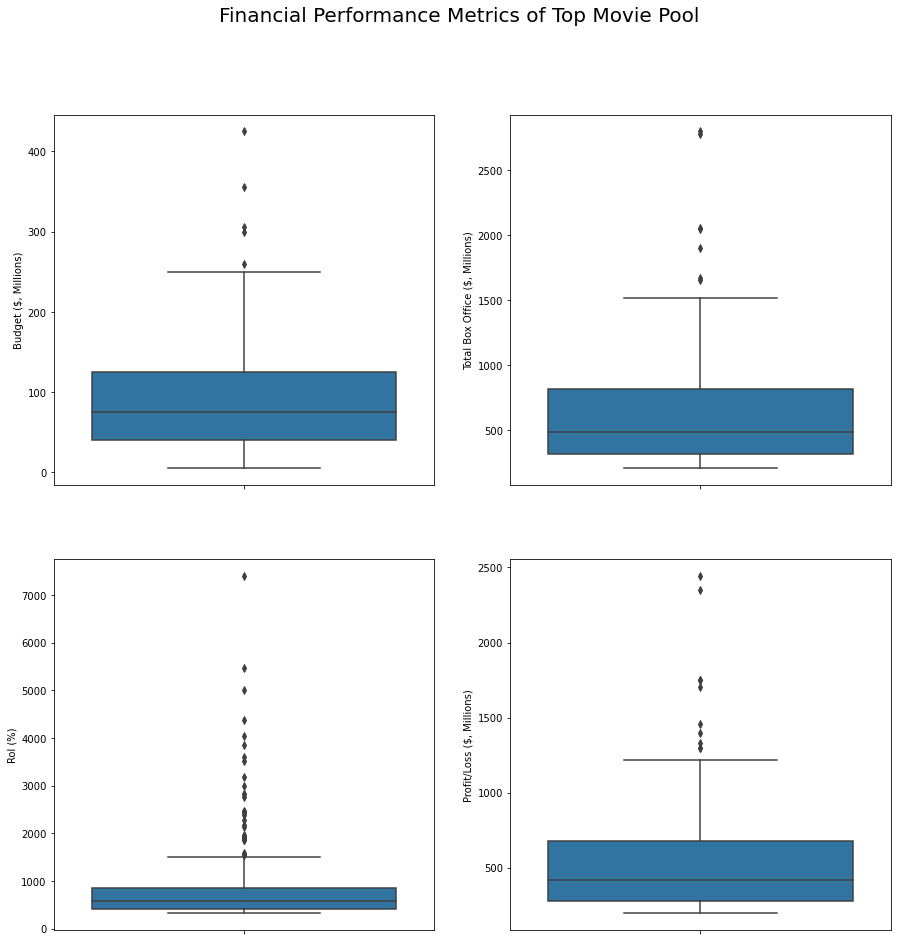

In [143]:
# let's plot these to get a better idea of the distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Financial Performance Metrics of Top Movie Pool', fontsize=20)

sns.boxplot(ax=axes[0, 0], y='Budget ($, Millions)' , data=test5)
sns.boxplot(ax=axes[0, 1], y='Total Box Office ($, Millions)' , data=test5)
sns.boxplot(ax=axes[1, 0], y='RoI (%)' , data=test5)
sns.boxplot(ax=axes[1, 1], y='Profit/Loss ($, Millions)' , data=test5)

plt.show()

Immediately, we see that each of these variables have many outliers in the extreme upper ranges! The distributions are heavily skewed.
What does this tell us? It means that we will probably see a large majority of movies have moderate amounts of success, but that when a movie makes it big, they make it very very big!

<Figure size 1440x1440 with 0 Axes>

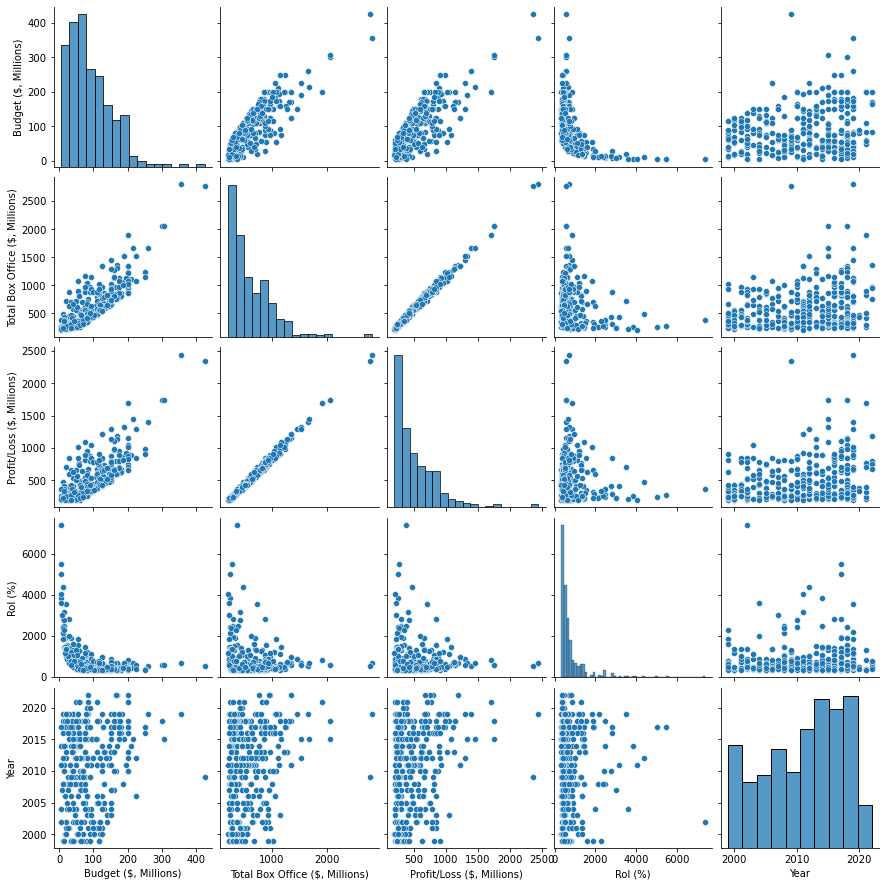

In [144]:
#take a quick look at the pairplots to see if any relational patterns or trends immediately stand out!
plt.figure(figsize=(20,20))
sns.pairplot(test5,palette="husl")

Do we see any immediate patterns or trends? I think I see a couple clear linear and inverse relationships! Let's investigate deeper.

In [145]:
#covariance measures
test5.cov()

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
"Budget ($, Millions)",4199.715978,21493.934938,17294.486484,-24101.287406,74.879098
"Total Box Office ($, Millions)",21493.934938,149547.521596,128056.437307,-53683.824654,560.856403
"Profit/Loss ($, Millions)",17294.486484,128056.437307,110764.556739,-29581.015567,485.950685
RoI (%),-24101.287406,-53683.824654,-29581.015567,692839.193875,95.925927
Year,74.879098,560.856403,485.950685,95.925927,40.846514


In [146]:
#calcuation correlation
test5.corr(method='pearson')

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
"Budget ($, Millions)",1.000000,0.857662,0.801858,-0.446801,0.180789
"Total Box Office ($, Millions)",0.857662,1.000000,0.994973,-0.166778,0.226926
"Profit/Loss ($, Millions)",0.801858,0.994973,1.000000,-0.106782,0.228462
RoI (%),-0.446801,-0.166778,-0.106782,1.000000,0.018032
Year,0.180789,0.226926,0.228462,0.018032,1.000000


This shows us that there is a strong positive linear relationship between Budget and Total Box Office!
Unsurprisingly, Budget and Profit also share that same stong positive linear relationship. We can say Budget is strongly correlated to both! 

(It's not worthwile to mention that Total Box Office and Profit have an almost absolute 1 to 1 positive relationship. This is expected because Profit is derived from Total Box Office by definition.)

Another interesting note here is the negative relationship between Budget and RoI. We can't exactly say they are correlated as the pearson coefficient is closer to 0 than it is to -1, but it's worth looking into further.

In [147]:
#check out what movies had the biggest budgets
test5.sort_values(by = 'Budget ($, Millions)', ascending = False).head(10)

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
1510,Avatar (2009),425.0,2776.0,2351.0,553.0,2009
187,Avengers: Endgame (2019),356.0,2798.0,2442.0,686.0,2019
4796,Star Wars Ep. VII: The Force Awakens (2015),306.0,2053.0,1747.0,571.0,2015
299,Avengers: Infinity War (2018),300.0,2048.0,1748.0,583.0,2018
188,The Lion King (2019),260.0,1657.0,1397.0,537.0,2019
434,The Fate of the Furious (2017),250.0,1236.0,986.0,394.0,2017
568,Captain America: Civil War (2016),250.0,1153.0,903.0,361.0,2016
1113,The Avengers (2012),225.0,1519.0,1294.0,575.0,2012
1935,Pirates of the Caribbean: Dead Man's Chest (2006),225.0,1066.0,841.0,374.0,2006
713,Jurassic World (2015),215.0,1670.0,1455.0,677.0,2015


In [148]:
#what movies had biggest gross
test5.sort_values(by = 'Total Box Office ($, Millions)', ascending = False).head(10)

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
187,Avengers: Endgame (2019),356.0,2798.0,2442.0,686.0,2019
1510,Avatar (2009),425.0,2776.0,2351.0,553.0,2009
4796,Star Wars Ep. VII: The Force Awakens (2015),306.0,2053.0,1747.0,571.0,2015
299,Avengers: Infinity War (2018),300.0,2048.0,1748.0,583.0,2018
48,Spider-Man: No Way Home (2021),200.0,1901.0,1701.0,851.0,2021
713,Jurassic World (2015),215.0,1670.0,1455.0,677.0,2015
188,The Lion King (2019),260.0,1657.0,1397.0,537.0,2019
714,Furious 7 (2015),190.0,1519.0,1329.0,699.0,2015
1113,The Avengers (2012),225.0,1519.0,1294.0,575.0,2012
189,Frozen II (2019),150.0,1450.0,1300.0,867.0,2019


In [149]:
#what movies had most Profit
test5.sort_values(by = 'Profit/Loss ($, Millions)', ascending = False).head(10)

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
187,Avengers: Endgame (2019),356.0,2798.0,2442.0,686.0,2019
1510,Avatar (2009),425.0,2776.0,2351.0,553.0,2009
299,Avengers: Infinity War (2018),300.0,2048.0,1748.0,583.0,2018
4796,Star Wars Ep. VII: The Force Awakens (2015),306.0,2053.0,1747.0,571.0,2015
48,Spider-Man: No Way Home (2021),200.0,1901.0,1701.0,851.0,2021
713,Jurassic World (2015),215.0,1670.0,1455.0,677.0,2015
188,The Lion King (2019),260.0,1657.0,1397.0,537.0,2019
714,Furious 7 (2015),190.0,1519.0,1329.0,699.0,2015
189,Frozen II (2019),150.0,1450.0,1300.0,867.0,2019
1113,The Avengers (2012),225.0,1519.0,1294.0,575.0,2012


In [150]:
#what movies had the best return?
test5.sort_values(by = 'RoI (%)', ascending = False).head(10)

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
2511,My Big Fat Greek Wedding (2002),5.0,375.0,370.0,7398.0,2002
6299,Split (2017),5.0,279.0,274.0,5479.0,2017
465,Get Out (2017),5.0,255.0,250.0,5008.0,2017
5812,Les Intouchables (2012),11.0,485.0,474.0,4390.0,2012
1270,Paranormal Activity 3 (2011),5.0,207.0,202.0,4041.0,2011
874,Annabelle (2014),6.0,257.0,251.0,3855.0,2014
2241,Fahrenheit 9/11 (2004),6.0,222.0,216.0,3607.0,2004
197,Ne Zha (2019),20.0,726.0,706.0,3530.0,2019
1253,The Intouchables (2011),13.0,427.0,414.0,3181.0,2011
1811,Juno (2007),8.0,232.0,225.0,2998.0,2007


We saw very similar movie titles comprise the top 10 lists for Budget, Total Box Office, and Profit!
However, we immediately see that the top 10 list for RoI contains vastly different movies than the top 10's of the previous three lists!

Let's visualize the data set in a scatter plot using seaborn.

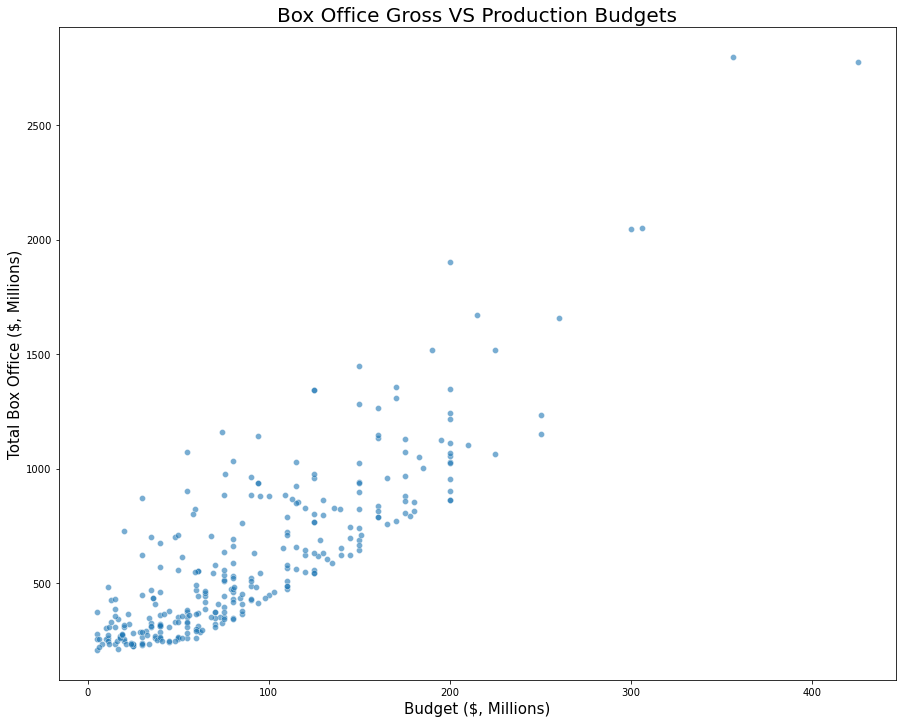

In [151]:
#Set plot size
plt.figure(figsize=(15, 12))

#Seaborn scatterplot based on worldwide gross and production budget
sns.scatterplot(x=test5['Budget ($, Millions)'],
                y=test5['Total Box Office ($, Millions)'], alpha=0.6)

#Set title and axis labels
plt.title('Box Office Gross VS Production Budgets', fontsize=20)
plt.xlabel('Budget ($, Millions)', fontsize=15)
plt.ylabel('Total Box Office ($, Millions)', fontsize=15)

plt.show()

As expected, we see a strong positive linear relationship. As hypothesized earlier, the large majority of successful movie datapoints are concentrated in the moderately successful range, but the wildly successful outliers are far outside the range!

I would, however, hesitate to say that those movies, such as Avengers and Avatar, are true outliers. In my opinion, they are not outliers due to the fact that this plot confirms that those two movies still follow the established strongly positive and linearly correlated trend line! Outliers, by definition, would not follow the trend line, and instead, would introduce skews. I would argue that these two movies do fall in line with trend/relationship suggested by the data as a whole!

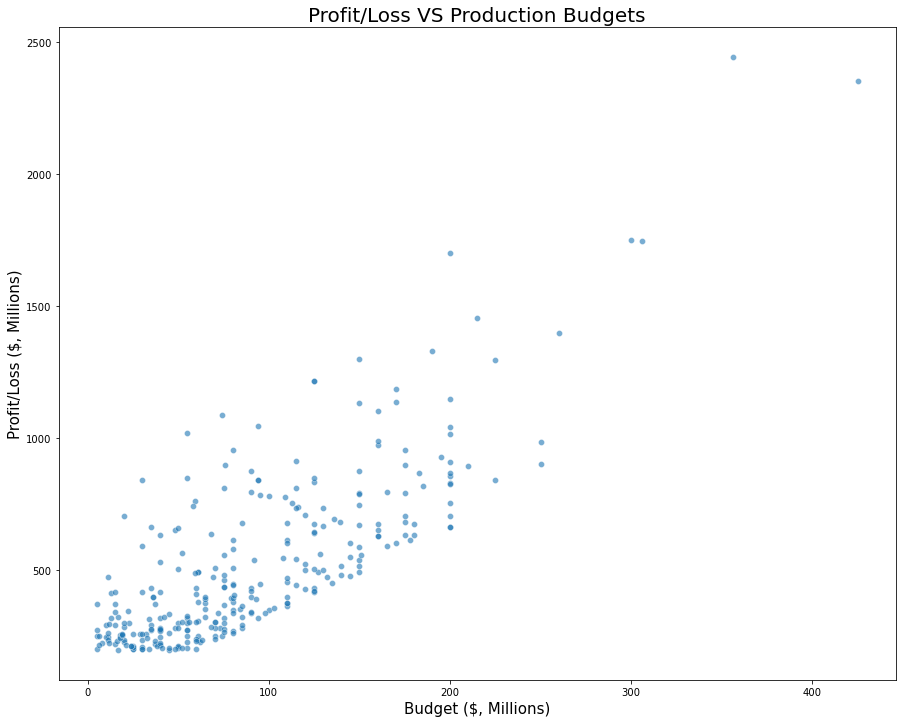

In [152]:
#Set plot size
plt.figure(figsize=(15, 12))

#Seaborn scatterplot based on profit/loss and production budget
sns.scatterplot(x=test5['Budget ($, Millions)'],
                y=test5['Profit/Loss ($, Millions)'], alpha=0.6)

#Set title and axis labels
plt.title('Profit/Loss VS Production Budgets', fontsize=20)
plt.xlabel('Budget ($, Millions)', fontsize=15)
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)

plt.show()

The plots of Profit VS Budget and Total Box Office VS Budget are nearly identical. This is expected as Profit is derived from Total Box Office. The same conclusions about the relationships and distributions can be made here.

We can use this plot to make begin formulating our production budget recommendation. From our earlier .describe() results, production budgets for these successful movies had an IQR of \\$40M - \\$125M, with an average of almost \\$90M and a median of \\$75M.

***
>Side Note: Next Steps and Improvement Opportunity
>* We ought to further explore the linear relationship seen here, derive the trendline equation, and perform some linear regression analysis, etc. For next time!
***

>Another Side Note:
>* At first glance, there seems to be a lower asymptote line that acts as a lower bound to this data set. One might want to conclude that at a certain point, you can guarantee an amount of profit per budget following the linearly sloped bound line. However, that is wrong. The lower asymptote is an artifical bound we created when we filtered the movie data set to only the visualize successful movies! As a comparison, see the plot of our **test2** dataframe, which has all 5000 recent movies, successful and unsuccessful. For what it's worth, a linear correlation seems to still exist, but not as strong and not as positive.

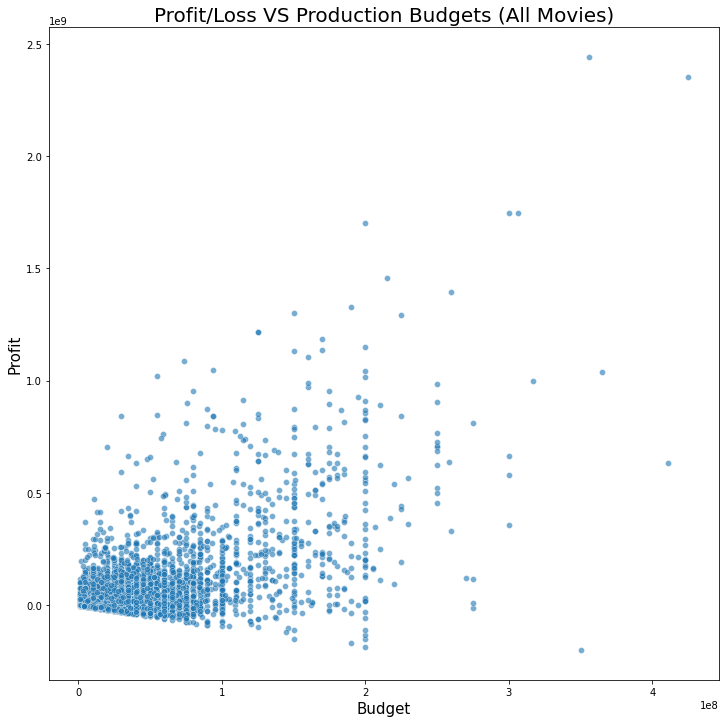

In [153]:
#Set plot size
plt.figure(figsize=(12, 12))

#Seaborn scatterplot
sns.scatterplot(x=test2['Budget UTD'],
                y=test2['PnL'], alpha=0.6)

#Set title and axis labels
plt.title('Profit/Loss VS Production Budgets (All Movies)', fontsize=20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Profit', fontsize=15)

plt.show()

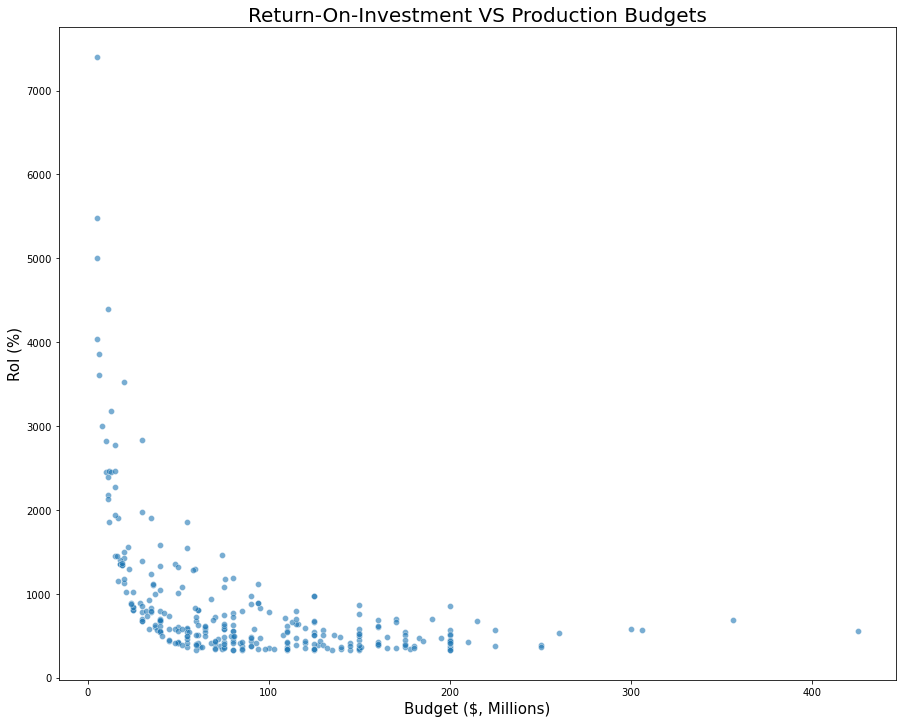

In [154]:
#Set plot size
plt.figure(figsize=(15, 12))

#Seaborn scatterplot based on roi and production budget
sns.scatterplot(x=test5['Budget ($, Millions)'],
                y=test5['RoI (%)'], alpha=0.6)

#Set title and axis labels
plt.title('Return-On-Investment VS Production Budgets', fontsize=20)
plt.xlabel('Budget ($, Millions)', fontsize=15)
plt.ylabel('RoI (%)', fontsize=15)

plt.show()

Here, we see a much different story. Budget has a clear inverse relationship with RoI, but they are not linearly correlated.
This is to be expected as the formula for RoI has Budget in the denominator.
What this plot tells us is that after around \\$100M budget mark, the rate of return for even the most successful movies will not be more than 10x.

The IQR for RoI for successful movies is around 420% to 850%, with a median of 575%.
The mean of 845% is practically the same as the upper IQR of 850%. This tells us that the distribution is heavily skewed to the left.

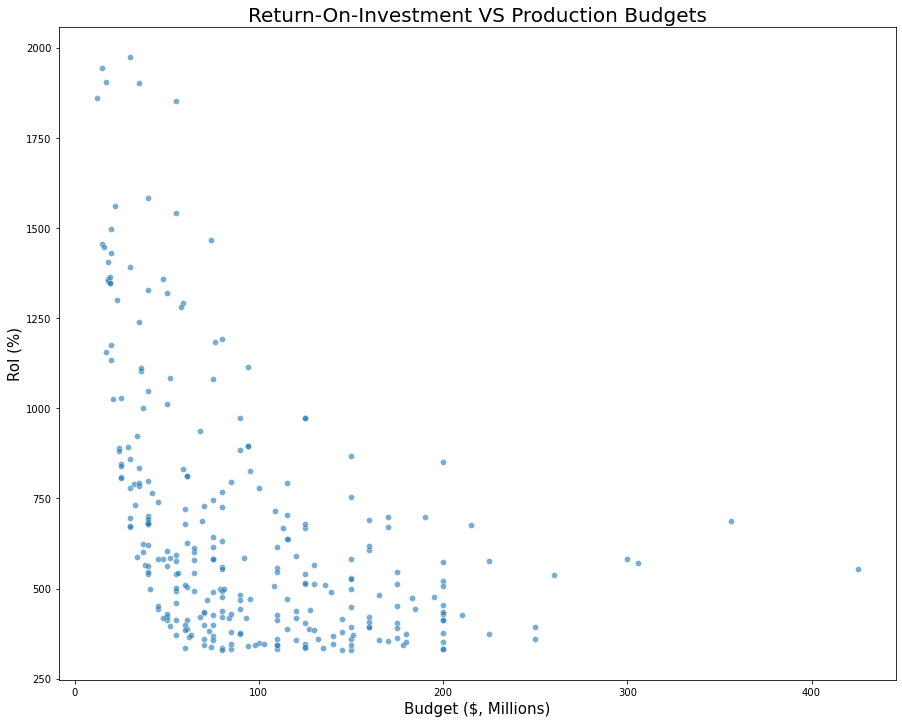

In [155]:
# Set plot size
plt.figure(figsize=(15, 12))

#Seaborn scatterplot based on roi and production budget
sns.scatterplot(x='Budget ($, Millions)',
                y='RoI (%)',
                data = test5[test5['RoI (%)'] < 2000],
                alpha=0.6)

#Set title and axis labels
plt.title('Return-On-Investment VS Production Budgets', fontsize=20)
plt.xlabel('Budget ($, Millions)', fontsize=15)
plt.ylabel('RoI (%)', fontsize=15)

plt.show()

Zooming in further to see the inverse relationship and distribution.
Using these observations, I would advise the studio that larger production budgets generally trend for bigger box office numbers and more profit. However, the larger the budget, the lower your rate of return will be. **I would suggest for the studio to aim for production budget of \\$125M**, the upper IQR value of successful movies, where box office gross and profits trend linearly high in absolute value, but also the rate of return is likely to remain substantially high!

***
### Data Analysis of Genres

We recall **testgenre2** dataframe has the exploded genre data for use in our Genre analysis.

In [156]:
testgenre2

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,genre_split
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,Action
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,Drama
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Adventure
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Action
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Science Fiction
...,...,...,...,...,...,...,...
310,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999,Comedy
310,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999,Family
311,The Sixth Sense (1999),40.0,673.0,633.0,1582.0,1999,Mystery
311,The Sixth Sense (1999),40.0,673.0,633.0,1582.0,1999,Thriller


In [157]:
#Use .value_counts() to get the counts of genres
testgenre2['genre_split'].value_counts()

Adventure          122
Comedy             106
Action             100
Drama               84
Family              71
Fantasy             67
Animation           59
Science Fiction     55
Thriller            50
Romance             41
Crime               25
Horror              18
Mystery             18
Music               13
War                  8
History              6
Documentary          3
Western              2
Name: genre_split, dtype: int64

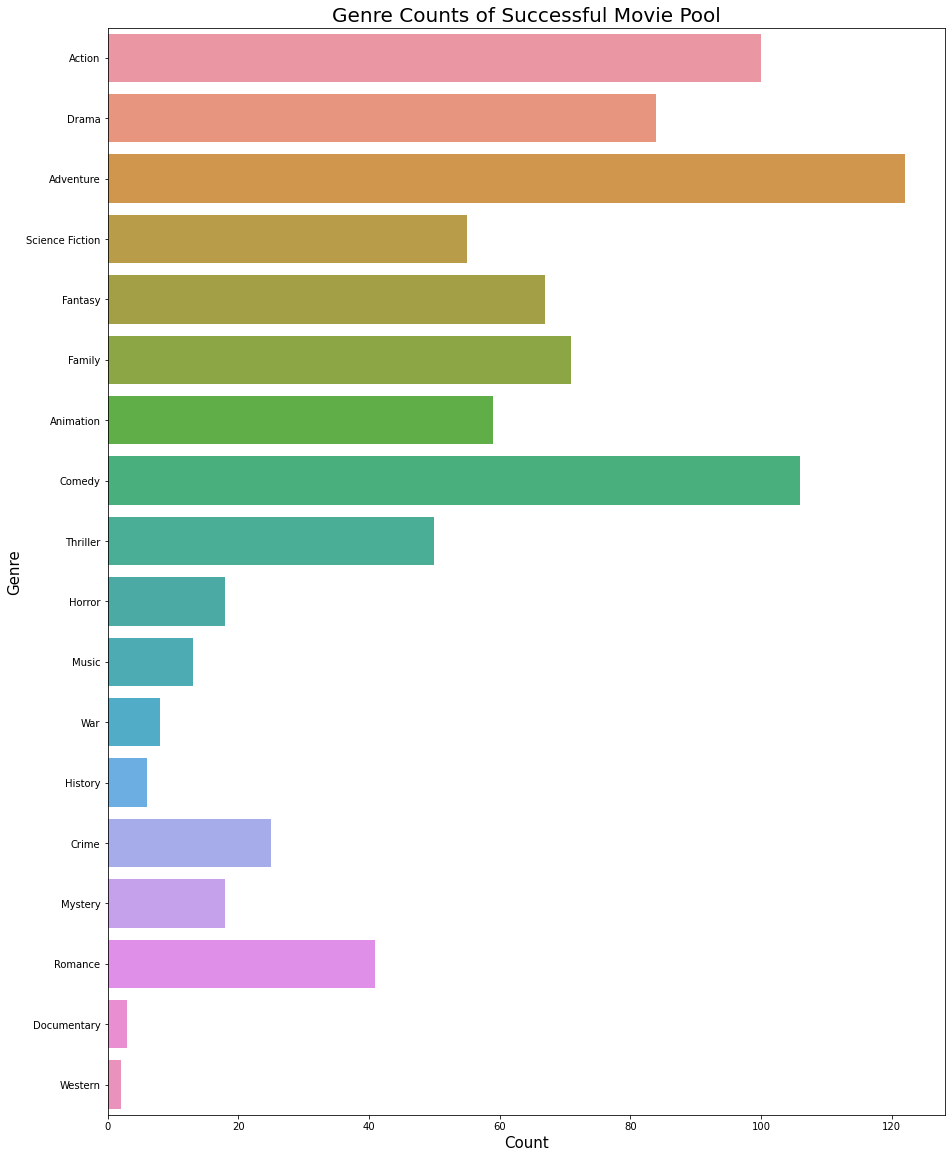

In [158]:
#Set plot size
plt.figure(figsize=(15,20))

#Seaborn barplot
sns.countplot(y='genre_split', data=testgenre2)

#Title and axis labels
plt.title('Genre Counts of Successful Movie Pool', fontsize=20)
plt.ylabel('Genre', fontsize=15)
plt.xlabel('Count', fontsize=15)

plt.show()

We note that **Adventure**, **Comedy**, **Action**, followed by **Drama** are the most common Genre classifications found in our pool of most successfull movies.

Let's group by genre to see what we can find!

In [159]:
#group by genre, take the mean, sort values!
testgenre2.groupby('genre_split').mean().sort_values(by = 'Budget ($, Millions)',ascending=False)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
genre_split,,,,,
Science Fiction,134.436364,838.563636,704.127273,570.727273,2012.818182
Adventure,131.401639,830.786885,699.385246,587.770492,2011.680328
Action,128.280000,789.020000,660.750000,587.150000,2012.220000
Fantasy,112.253731,743.656716,631.402985,665.014925,2011.358209
Animation,103.813559,676.711864,572.898305,635.525424,2011.813559
Family,103.267606,664.591549,561.309859,643.774648,2011.746479
Crime,87.720000,531.280000,443.560000,555.120000,2011.160000
Thriller,83.840000,549.860000,466.000000,875.060000,2012.620000
Comedy,74.415094,515.358491,440.924528,839.783019,2010.433962


We see that, on average, **Sci Fi**, **Adventure**, **Action**, and **Fantasy** moviess are the most expensive to make, and have the higher average budgets.

In [160]:
testgenre2.groupby('genre_split').mean().sort_values(by = 'Profit/Loss ($, Millions)',ascending=False)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
genre_split,,,,,
Science Fiction,134.436364,838.563636,704.127273,570.727273,2012.818182
Adventure,131.401639,830.786885,699.385246,587.770492,2011.680328
Action,128.280000,789.020000,660.750000,587.150000,2012.220000
Fantasy,112.253731,743.656716,631.402985,665.014925,2011.358209
Animation,103.813559,676.711864,572.898305,635.525424,2011.813559
Family,103.267606,664.591549,561.309859,643.774648,2011.746479
War,73.625000,546.375000,473.000000,954.375000,2015.000000
Thriller,83.840000,549.860000,466.000000,875.060000,2012.620000
Crime,87.720000,531.280000,443.560000,555.120000,2011.160000


Further cementing the linear correlation we found in our budget analysis earlier, the same 4 genres, **Sci Fi**, **Adventure**, **Action**, and **Fantasy**, top the list in the same exact order when sorted for average Profit as well!

In [161]:
testgenre2.groupby('genre_split').mean().sort_values(by = 'RoI (%)',ascending=False)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
genre_split,,,,,
Horror,29.222222,320.833333,291.611111,1752.777778,2015.277778
Documentary,53.666667,341.666667,288.000000,1471.000000,2009.333333
History,41.833333,451.333333,409.500000,1286.333333,2015.000000
Mystery,54.833333,409.555556,354.722222,1211.000000,2011.777778
Romance,51.414634,432.560976,381.146341,1154.853659,2008.731707
Drama,61.535714,485.261905,423.726190,1112.047619,2011.202381
War,73.625000,546.375000,473.000000,954.375000,2015.000000
Thriller,83.840000,549.860000,466.000000,875.060000,2012.620000
Music,63.615385,471.692308,408.076923,863.615385,2013.538462


When sorting by RoI, we see that the genres that typically have lower budgets produce the higher average rate of return.
The genres topping this list are **Horror**, **Documentaries**, **History**, and **Mystery**. 

Intereting to note here is that **Westerns** have both the lowest Profit and the lowest RoI. Ouch!

In [162]:
#create data for plotting
testgenre3 = testgenre2.groupby('genre_split').mean().sort_values(by = 'Profit/Loss ($, Millions)',ascending=False)

In [163]:
#reset index so coloring is sequential and easier to read
testgenre4 = testgenre3.reset_index()

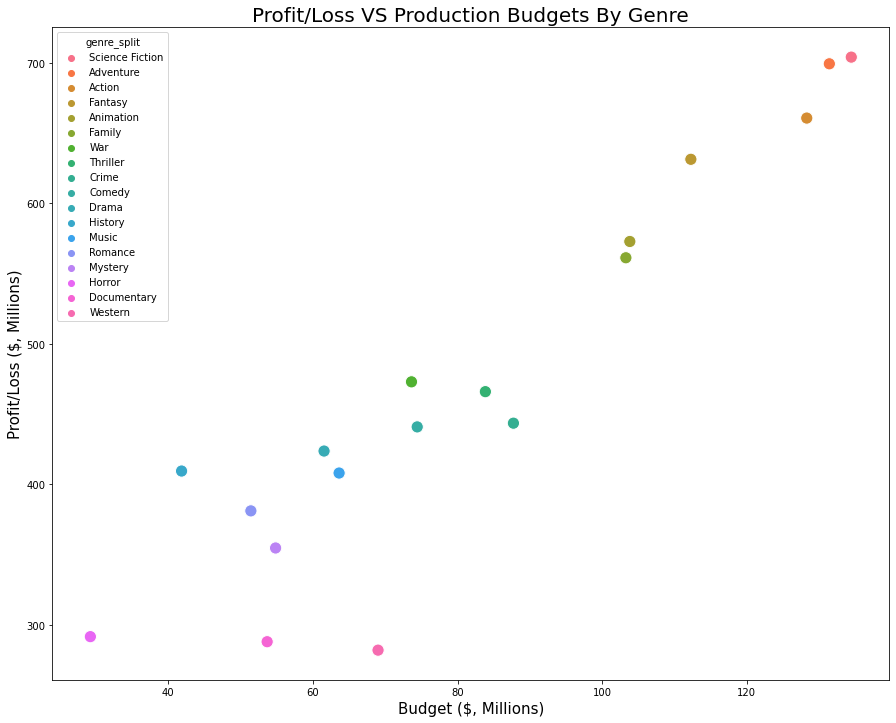

In [164]:
#Set plot size
plt.figure(figsize=(15, 12))

# Seaborn scatterplot based on profit/loss and production budget, colored by genre!
sns.scatterplot(x='Budget ($, Millions)',y='Profit/Loss ($, Millions)', data=testgenre4, hue='genre_split', s=150)

# Set title and axis labels
plt.title('Profit/Loss VS Production Budgets By Genre', fontsize=20)
plt.xlabel('Budget ($, Millions)', fontsize=15)
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)

plt.show()

Here we see our strongly correlated, positive linear relationship between budget and profit. **Sci-Fi**, **Action**, and **Adventure** bring in the most money, but they're also typically more expensive to make!

**Westerns** are relatively expensive to make considering how little profit they generate!

In [165]:
#group by, get mean, sort by RoI
testgenre5 = testgenre2.groupby('genre_split').mean().sort_values(by = 'RoI (%)',ascending=False).reset_index()

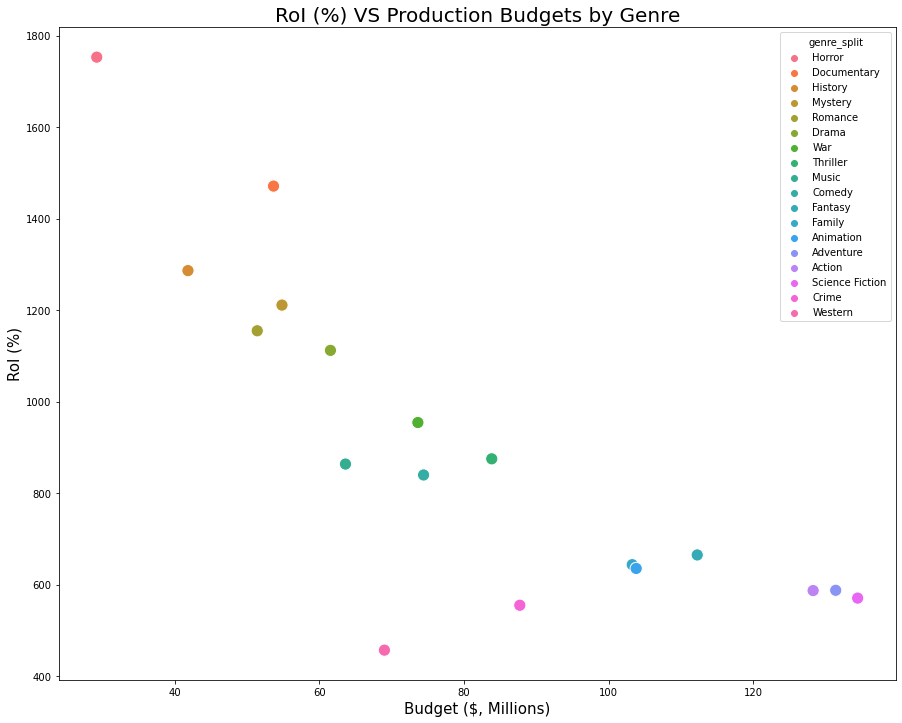

In [166]:
#Set plot size
plt.figure(figsize=(15, 12))

#Seaborn scatterplot based on roi and production budget, colored by genre
sns.scatterplot(x='Budget ($, Millions)',y='RoI (%)', data=testgenre5, hue='genre_split', s=150)

#Set title and axis labels
plt.title('RoI (%) VS Production Budgets by Genre', fontsize=20)
plt.xlabel('Budget ($, Millions)', fontsize=15)
plt.ylabel('RoI (%)', fontsize=15)

plt.show()

Here we see our inverse relationship of budget and Roi. It seems **Horror** movies are relatively cheap to make , and they don't bring in much gross profit, but they do produce a high rate of return!

Based on these observations, **I would advise the studio to make an Action and Adventure movie** because those two genres are among the most common genres found in our pool of successful movies and also consistently generate the highest amount of Profit. Action and Adventure average budgets also line up with the earlier recommended budget value. 

The trick here would be trying to find a way to keep the costs and budget low as Action and Adventure movies trend to have higher budgets compared to other genres. If the studio can figure out how to reduce the budget by about \\$5M cheaper than their current trending average, say a total budget of \\$125M, you would see an RoI improvement as well. 

**If the studio can only afford a small budget, then make a Horror movie for sure! No matter what, avoid making a Western movie.**

***
### Data Analysis of Cast and Crew

We recall that the **test9** dataframe contains our cast and crew data!

In [167]:
test9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie (year)                    308 non-null    object 
 1   Budget ($, Millions)            308 non-null    float64
 2   Total Box Office ($, Millions)  308 non-null    float64
 3   Profit/Loss ($, Millions)       308 non-null    float64
 4   RoI (%)                         308 non-null    float64
 5   Year                            308 non-null    int64  
 6   director                        262 non-null    object 
 7   writer                          243 non-null    object 
 8   lead actor                      267 non-null    object 
 9   lead actress                    246 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 26.5+ KB


In [168]:
test9

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,director,writer,lead actor,lead actress
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,Joseph Kosinski,Jim Cash,Tom Cruise,Jennifer Connelly
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Colin Trevorrow,Emily Carmichael,Chris Pratt,Bryce Dallas Howard
2,Doctor Strange in the Multiverse of Madness (2...,200.0,955.0,755.0,377.0,2022,Sam Raimi,Michael Waldron,Benedict Cumberbatch,Elizabeth Olsen
3,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022,Kyle Balda,Matthew Fogel,Steve Carell,Taraji P. Henson
4,Encanto (2021),50.0,257.0,207.0,413.0,2021,Jared Bush,Jason Hand,John Leguizamo,Stephanie Beatriz
...,...,...,...,...,...,...,...,...,...,...
303,Runaway Bride (1999),70.0,310.0,240.0,343.0,1999,Garry Marshall,Josann McGibbon,Richard Gere,Julia Roberts
304,American Beauty (1999),15.0,356.0,341.0,2275.0,1999,Sam Mendes,Alan Ball,Kevin Spacey,Annette Bening
305,The Matrix (1999),65.0,464.0,399.0,613.0,1999,Lana Wachowski,NaN,Keanu Reeves,Carrie-Anne Moss
306,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999,John Lasseter,Pete Docter,Tom Hanks,Joan Cusack


In [169]:
#make list for cast and crew column names
castcrew = ['director', 'writer', 'lead actor', 'lead actress']

In [170]:
#use for loop to print top ten most common individuals per category
for col in castcrew:
    print(col, ' Top Ten Most Common:')
    print(test9[col].value_counts().head(10))
    print('\n')


director  Top Ten Most Common:
Jay Roach             4
James Wan             4
Wes Ball              3
Kyle Balda            3
Carlos Saldanha       3
Guy Ritchie           3
Chris Renaud          3
Brad Bird             3
Peter Jackson         3
Genndy Tartakovsky    3
Name: director, dtype: int64


writer  Top Ten Most Common:
Melissa Rosenberg     5
J.K. Rowling          4
Chris McKenna         4
Cinco Paul            4
Jonathan Aibel        4
Bruce Geller          4
Michael McCullers     3
Christopher Markus    3
Jon Vitti             3
J.R.R. Tolkien        3
Name: writer, dtype: int64


lead actor  Top Ten Most Common:
Tom Cruise           6
Chris Pratt          6
Tom Hanks            6
Daniel Radcliffe     6
Mike Myers           6
Robert Downey Jr.    6
Will Smith           5
Robert Pattinson     5
Ben Stiller          4
Dwayne Johnson       4
Name: lead actor, dtype: int64


lead actress  Top Ten Most Common:
Emma Watson          6
Kristen Stewart      5
Sandra Bullock       4


The 40 principals above consistently are involved in making successful movies. You can't go wrong with having any of these individuals as a part of your cast and crew. They know how to make profitable movies!

Let's perform a few groupbys by cast and crew to refine our recommendations!

In [171]:
test9.groupby('director').mean().sort_values(by = 'Total Box Office ($, Millions)',ascending=False).head(5)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
director,,,,,
James Cameron,425.0,2776.000000,2351.000000,553.000000,2009.000000
Anthony Russo,302.0,1999.666667,1697.666667,543.333333,2017.666667
Joss Whedon,225.0,1519.000000,1294.000000,575.000000,2012.000000
Chris Buck,150.0,1365.500000,1215.500000,810.500000,2016.000000
Joseph Kosinski,170.0,1355.000000,1185.000000,697.000000,2022.000000


In [172]:
test9.groupby('writer').mean().sort_values(by = 'Total Box Office ($, Millions)',ascending=False).head(5)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
writer,,,,,
Christopher Markus,302.0,1999.666667,1697.666667,543.333333,2017.666667
Jeff Nathanson,260.0,1657.000000,1397.000000,537.000000,2019.000000
Zak Penn,225.0,1519.000000,1294.000000,575.000000,2012.000000
Hans Christian Andersen,150.0,1365.500000,1215.500000,810.500000,2016.000000
Jim Cash,170.0,1355.000000,1185.000000,697.000000,2022.000000


In [173]:
test9.groupby('lead actor').mean().sort_values(by = 'Profit/Loss ($, Millions)',ascending=False).head(5)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
lead actor,,,,,
Sam Worthington,425.0,2776.000000,2351.000000,553.000000,2009.000000
Donald Glover,260.0,1657.000000,1397.000000,537.000000,2019.000000
Josh Gad,150.0,1450.000000,1300.000000,867.000000,2019.000000
Robert Downey Jr.,216.0,1441.333333,1225.333333,528.166667,2013.666667
Chadwick Boseman,200.0,1348.000000,1148.000000,574.000000,2018.000000


In [174]:
test9.groupby('lead actor').mean().sort_values(by = 'RoI (%)',ascending=False).head(5)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
lead actor,,,,,
John Corbett,5.0,375.0,370.0,7398.0,2002.0
Daniel Kaluuya,5.0,255.0,250.0,5008.0,2017.0
Christopher Nicholas Smith,5.0,207.0,202.0,4041.0,2011.0
Ward Horton,6.0,257.0,251.0,3855.0,2014.0
Joseph,20.0,726.0,706.0,3530.0,2019.0


In [175]:
#create a table grouped my lead actor with their mean metrics
malemetrics = test9.groupby('lead actor').mean()

In [176]:
#we see there are 14 leads actors who have made at least 4 appearances
#save to list
topmaleVC = test9['lead actor'].value_counts().head(14)

In [177]:
topmaleVClist = topmaleVC.index.tolist()

In [178]:
#pull those top lead actors metric data
malemetrics.loc[topmaleVClist]

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
lead actor,,,,,
Tom Cruise,150.000000,780.500000,630.500000,412.666667,2011.833333
Chris Pratt,163.333333,1007.333333,844.000000,532.666667,2016.666667
Tom Hanks,123.333333,690.333333,567.000000,448.500000,2005.500000
Daniel Radcliffe,130.000000,972.166667,842.166667,662.000000,2005.000000
Mike Myers,105.500000,601.166667,495.666667,529.166667,2003.833333
Robert Downey Jr.,216.000000,1441.333333,1225.333333,528.166667,2013.666667
Will Smith,94.600000,506.400000,411.800000,427.400000,2010.800000
Robert Pattinson,77.000000,673.000000,596.000000,879.400000,2010.000000
Ben Stiller,97.500000,544.750000,447.250000,474.000000,2005.500000


In [179]:
#create dataframe for plotting
maledata = malemetrics.loc[topmaleVClist].sort_values(by = 'Profit/Loss ($, Millions)', ascending=False).reset_index()

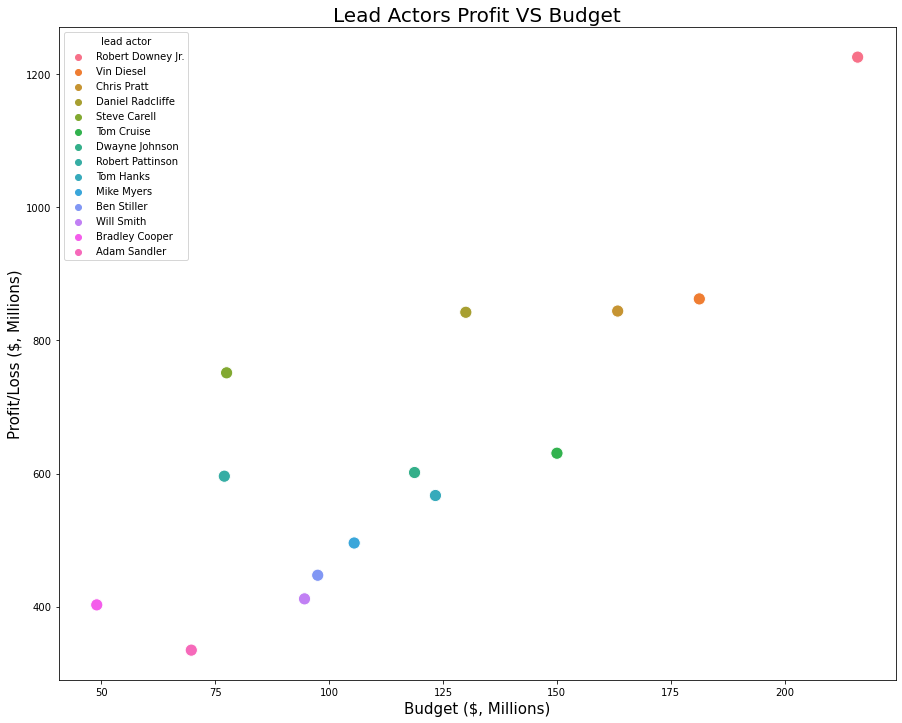

In [180]:
# Create a plot and set the appropriate size
plt.figure(figsize=(15, 12))
# Draw a seaborn scatterplot
sns.scatterplot(y='Profit/Loss ($, Millions)',x='Budget ($, Millions)', data=maledata, hue='lead actor', s=150)
# Set title of plot
plt.title('Lead Actors Profit VS Budget', fontsize=20)
# Set y-axis label and fontsize
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)
# Set x-axis label and fontsize
plt.xlabel('Budget ($, Millions)', fontsize=15)

plt.show()

Each one of these lead actors are proven to consistently make successful movies. You can't go wrong with any of them, however, which lead actor would be the best fit our movie studio's first movie? Let's keep in mind our earlier two recommendations!

We are looking for an Action and Adventure movie star who typically makes movies in the $150M dollar range.
RDJ, Vin Diesel, and Chris Pratt are priced out, as most of their movies are Marvel movies with excessive budgets.
Daniel Radcliffe and Steve Carell are not Action movie stars.

That leaves us with **Tom Cruise** and **The Rock**! Both of these stars are close to our budget range, and know how to make Action and Adventure movies!


In [181]:
#create dataframe for boxplots
maleboxdata = test9[test9['lead actor'].isin(topmaleVClist)]

In [182]:
#preview data
maleboxdata.head(10)

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,director,writer,lead actor,lead actress
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,Joseph Kosinski,Jim Cash,Tom Cruise,Jennifer Connelly
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022,Colin Trevorrow,Emily Carmichael,Chris Pratt,Bryce Dallas Howard
3,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022,Kyle Balda,Matthew Fogel,Steve Carell,Taraji P. Henson
12,Bad Boys for Life (2020),90.0,427.0,337.0,374.0,2020,Adil El Arbi,Peter Craig,Will Smith,Vanessa Hudgens
17,Avengers: Endgame (2019),356.0,2798.0,2442.0,686.0,2019,Anthony Russo,Christopher Markus,Robert Downey Jr.,NaN
23,Jumanji: The Next Level (2019),125.0,800.0,675.0,540.0,2019,Jake Kasdan,Jeff Pinkner,Dwayne Johnson,Karen Gillan
32,Aladdin (2019),183.0,1051.0,868.0,474.0,2019,Guy Ritchie,John August,Will Smith,Naomi Scott
33,Toy Story 4 (2019),175.0,1073.0,898.0,513.0,2019,Josh Cooley,John Lasseter,Tom Hanks,Annie Potts
39,Avengers: Infinity War (2018),300.0,2048.0,1748.0,583.0,2018,Anthony Russo,Christopher Markus,Robert Downey Jr.,NaN
41,Jurassic World: Fallen Kingdom (2018),170.0,1308.0,1138.0,670.0,2018,J.A. Bayona,Derek Connolly,Chris Pratt,Bryce Dallas Howard


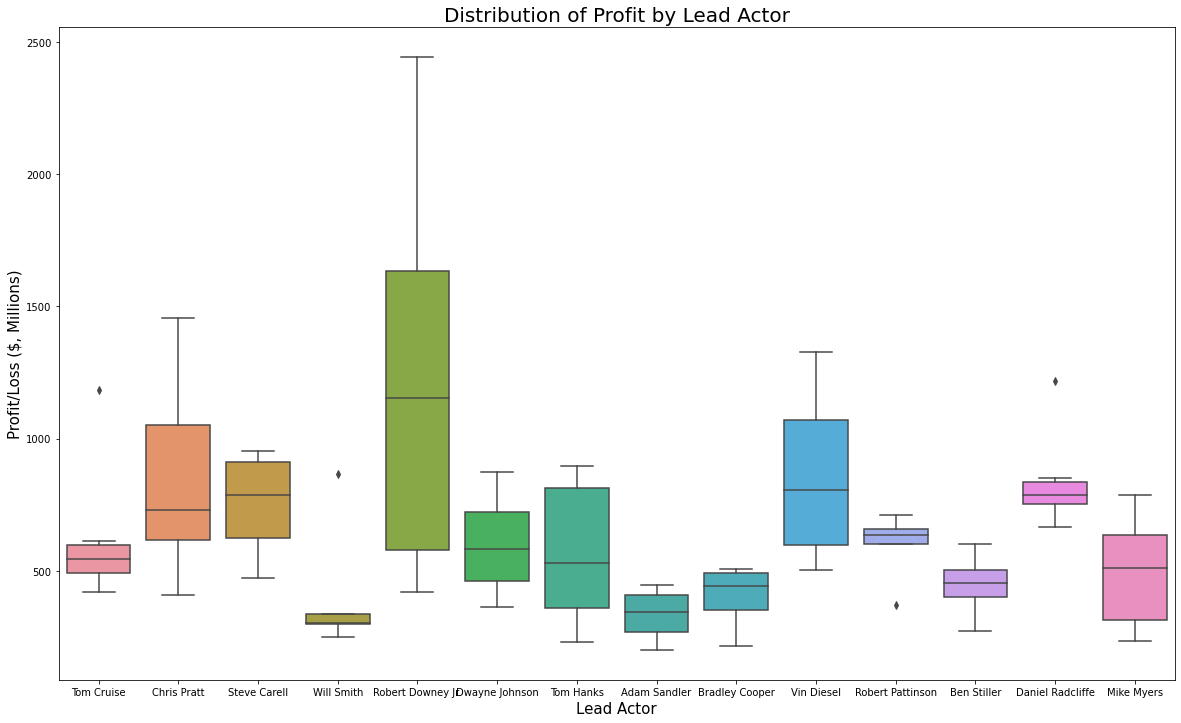

In [183]:
# Create a plot and define its size.
plt.figure(figsize=(20, 12))
# Draw a boxplot 
sns.boxplot(x='lead actor',
            y='Profit/Loss ($, Millions)',data=maleboxdata)
# Set the plot title
plt.title('Distribution of Profit by Lead Actor', fontsize=20)
# Set the x-axis Label and define fontsize
plt.xlabel('Lead Actor', fontsize=15)
# Set the y-axis label and define fontsize
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)

plt.show()

We can see here the various distributions of profit among the lead actors. Between Tom Cruise and The Rock specifically, Tom Cruise is more consistent than the Rock. Both share similar medians for Profit but Tom Cruise has the higher mean. Tom Cruise also has higher budgets, but also a potential to produce a crazy successful outlier movie! **I would recommend Tom Cruise!**

Let's do the same type of study for actresses!


In [184]:
#take the top 10 recurring billed actresses from top movie pool
top10femaleVC = test9['lead actress'].value_counts().head(10)

#turn series into list
top10femaleVClist = top10femaleVC.index.tolist()

#create averages data for scatter plot
femalemetrics = test9.groupby('lead actress').mean()
femaledata = femalemetrics.loc[top10femaleVClist].reset_index()

#create dataframe slice for boxplot
femaleboxdata = test9[test9['lead actress'].isin(top10femaleVClist)]

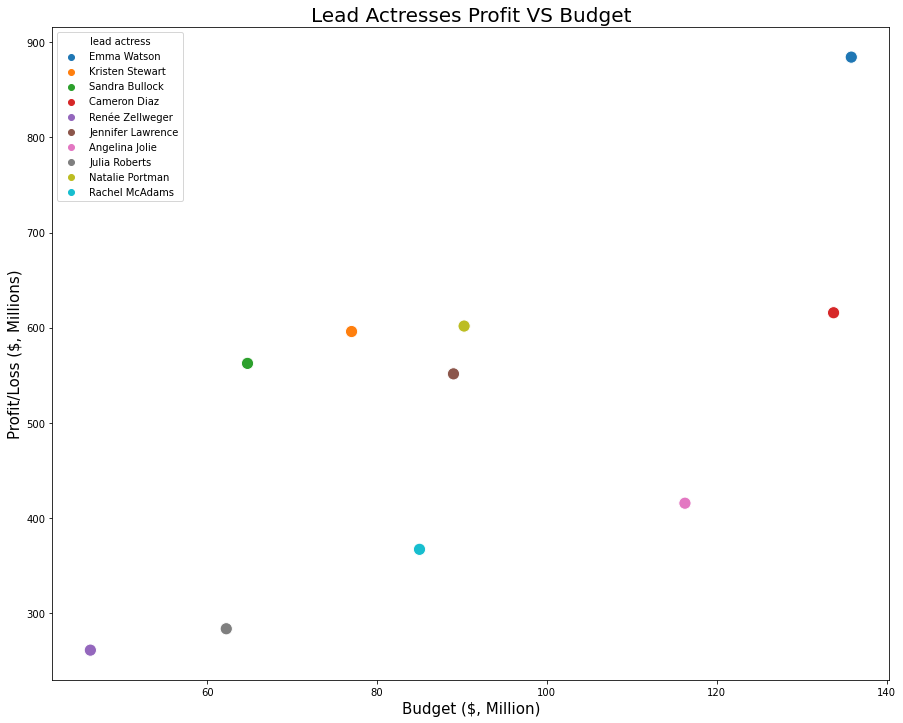

In [185]:
# Create a plot and set the appropriate size
plt.figure(figsize=(15, 12))
# Draw a seaborn scatterplot
sns.scatterplot(y='Profit/Loss ($, Millions)',x='Budget ($, Millions)', data=femaledata, hue='lead actress', s=150)
# Set title of plot
plt.title('Lead Actresses Profit VS Budget', fontsize=20)
# Set y-axis label and fontsize
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)
# Set x-axis label and fontsize
plt.xlabel('Budget ($, Million)', fontsize=15)

plt.show()

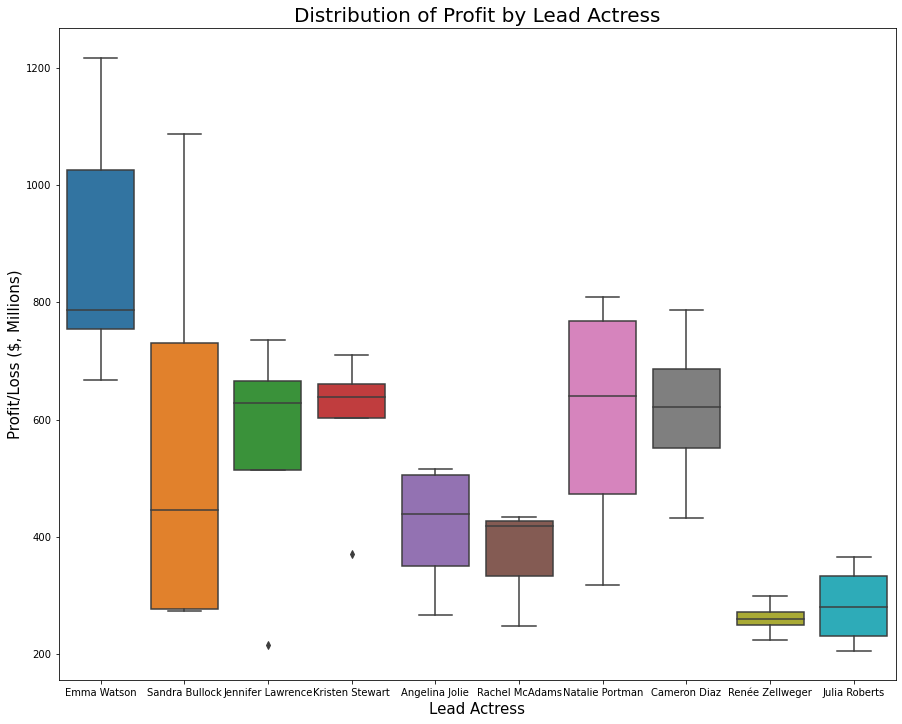

In [186]:
# Create a plot and define its size.
plt.figure(figsize=(15, 12))
# Draw a boxplot 
sns.boxplot(x='lead actress',
            y='Profit/Loss ($, Millions)',data=femaleboxdata)
# Set the plot title
plt.title('Distribution of Profit by Lead Actress', fontsize=20)
# Set the x-axis Label and define fontsize
plt.xlabel('Lead Actress', fontsize=15)
# Set the y-axis label and define fontsize
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)

# Show plot
plt.show()

Per the two plots above, it's clear that Emma Watson has outperformed her peers. Her averages and medians are much higher, and her budget range is not too far away from our goal. **I would recommend Emma Watson.**

Moving onto director!

In [187]:
#take the top averaging directors from top movie pool
#top10dirVC = test9['director'].value_counts().head(10)

#turn series into list
#top10dirVClist = top10dirVC.index.tolist()

#create averages data for scatter plot, take top 10
dirmetrics = test9.groupby('director').mean().sort_values(by = 'Profit/Loss ($, Millions)',ascending=False).head(10)
dirdata = dirmetrics.reset_index()

#take above top 10 series into list
top10dirVClist = dirmetrics.index.tolist()

#create dataframe slice for boxplot
dirboxdata = test9[test9['director'].isin(top10dirVClist)]


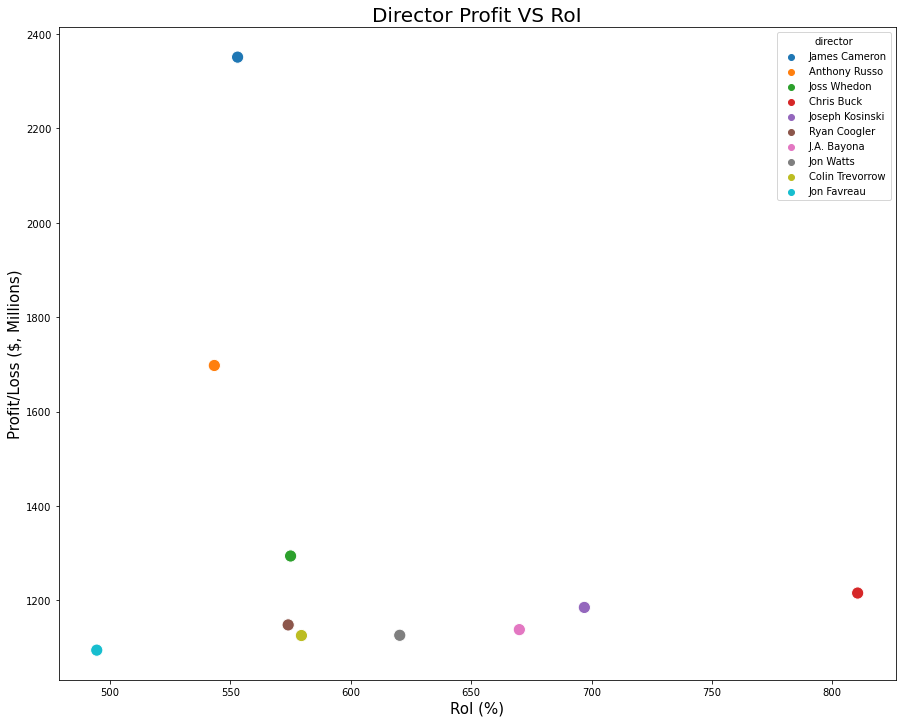

In [188]:
# Create a plot and set the appropriate size
plt.figure(figsize=(15, 12))
# Draw a seaborn scatterplot
sns.scatterplot(y='Profit/Loss ($, Millions)',x='RoI (%)', data=dirdata, hue='director', s=150)
# Set title of plot
plt.title('Director Profit VS RoI', fontsize=20)
# Set y-axis label and fontsize
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)
# Set x-axis label and fontsize
plt.xlabel('RoI (%)', fontsize=15)

plt.show()

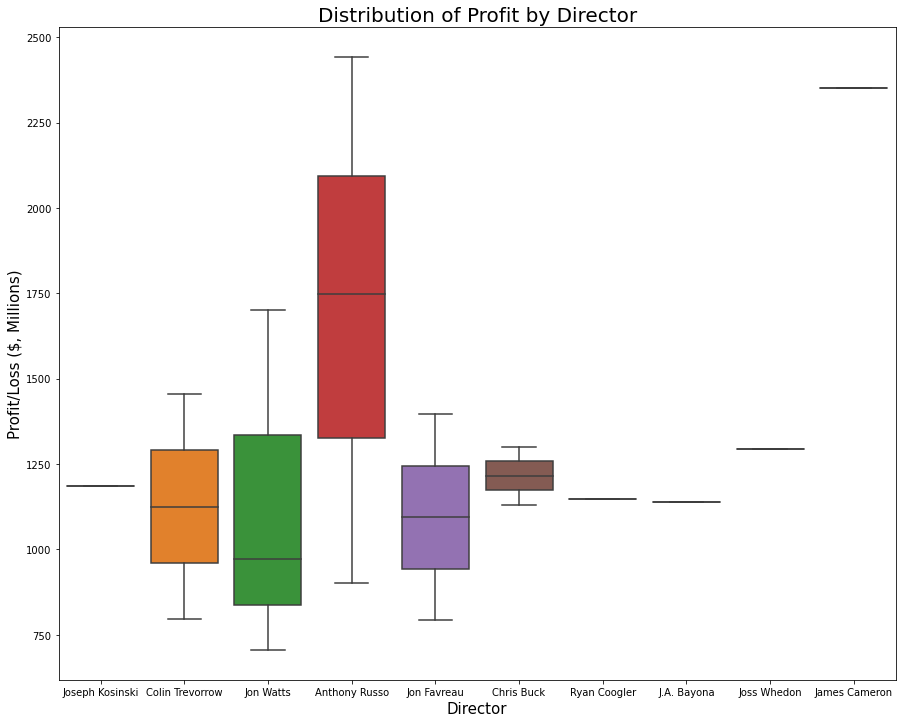

In [189]:
# Create a plot and define its size.
plt.figure(figsize=(15, 12))
# Draw a boxplot 
sns.boxplot(x='director',
            y='Profit/Loss ($, Millions)',data=dirboxdata)
# Set the plot title
plt.title('Distribution of Profit by Director', fontsize=20)
# Set the x-axis Label and define fontsize
plt.xlabel('Director', fontsize=15)
# Set the y-axis label and define fontsize
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)

# Show plot
plt.show()

The battle here per the plotted data would be between James Cameron and Anthony Russo. They chart above their peers.
Due to the fact that James Cameron only has one data point, **I would recommend Anthony Russo** for the proven consistency and reliability of data!

For choosing a writer, let's use the .sum() aggregate this time.

In [190]:
#create sum data for scatter plot, take top 10
wrimetrics = test9.groupby('writer').sum().sort_values(by = 'Total Box Office ($, Millions)',ascending=False).head(10)
wridata = wrimetrics.reset_index()

#take above top 10 series into list
top10wriVClist = wrimetrics.index.tolist()

#create dataframe slice for boxplot
wriboxdata = test9[test9['writer'].isin(top10wriVClist)]

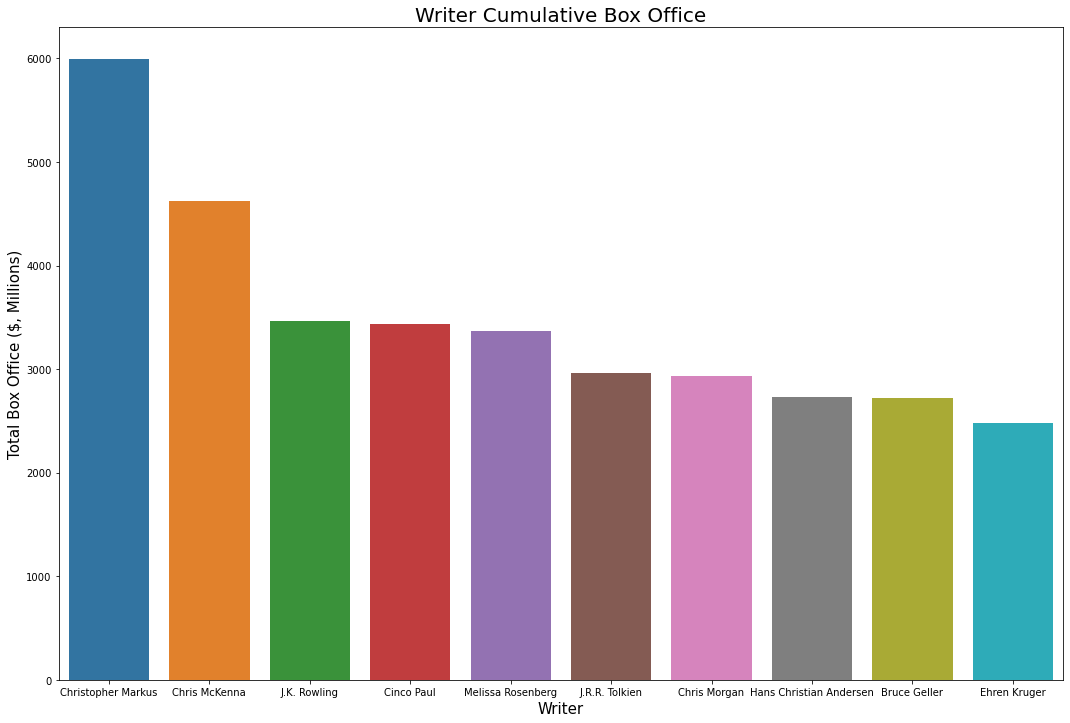

In [191]:
# Create a plot and set the appropriate size
plt.figure(figsize=(18, 12))
# Draw a seaborn scatterplot
sns.barplot(y='Total Box Office ($, Millions)',x='writer', data=wridata)
# Set title of plot
plt.title('Writer Cumulative Box Office', fontsize=20)
# Set y-axis label and fontsize
plt.ylabel('Total Box Office ($, Millions)', fontsize=15)
# Set x-axis label and fontsize
plt.xlabel('Writer', fontsize=15)

plt.show()

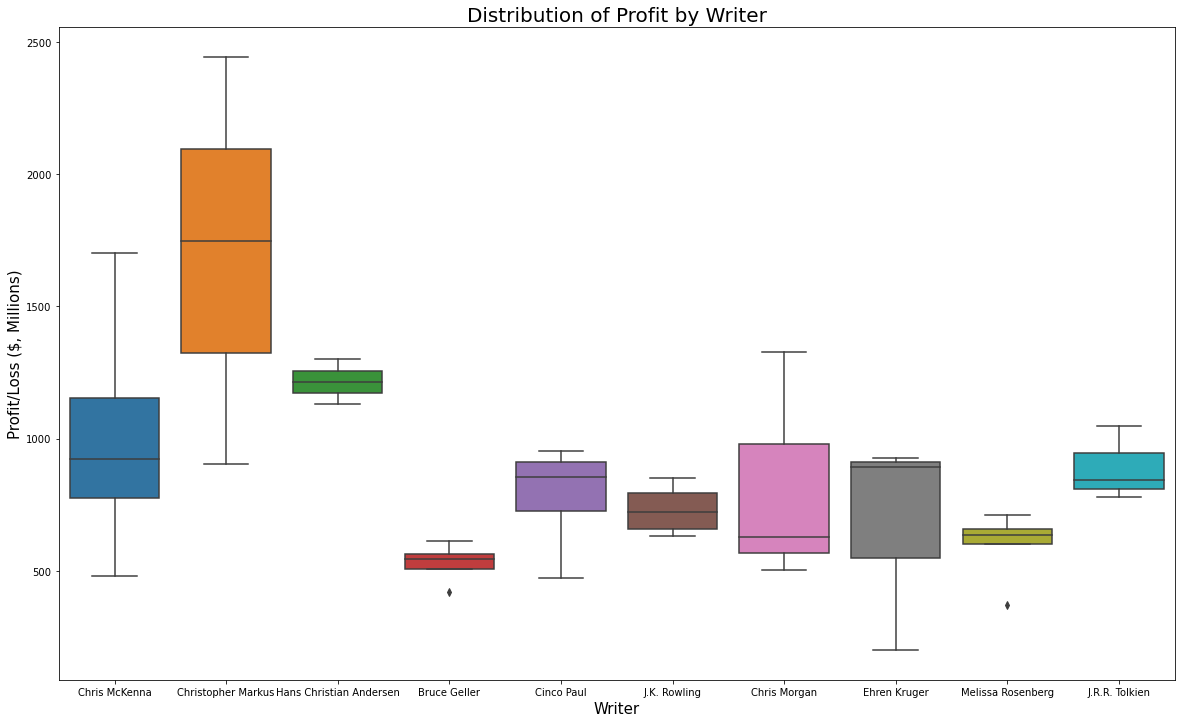

In [192]:
# Create a plot and define its size.
plt.figure(figsize=(20, 12))
# Draw a boxplot
sns.boxplot(x='writer',
            y='Profit/Loss ($, Millions)',data=wriboxdata)
# Set the plot title
plt.title('Distribution of Profit by Writer', fontsize=20)
# Set the x-axis Label
plt.xlabel('Writer', fontsize=15)
# Set the y-axis label
plt.ylabel('Profit/Loss ($, Millions)', fontsize=15)

plt.show()

Based off of these plots, **I would recommend Christopher Markus to be the writer**. His metrics are higher across the board, and he's produced the most profit cumulatively for Hollywood!

## Conclusion

In today's modern world, a movie's financial performance defines it's success. Studios are only interested in Profit and their Return-On-Investment. 

Based off the data analysis, I would recommend to Microsoft's new Movie Studio to secure a **production budget of ~$125M** to make the next **Action & Adventure** movie starring **Tom Cruise** and **Emma Watson**, with **Anthony Russo** directing a story written by **Christophr Markus**.

This combination is almost guaranteed to be the greatest movie of all time.